# Import Libraries

In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set rows and cols option for pandas
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_columns', 500)

# Load data, check its structure / metadata

In [4]:
# Read the csv files
application = pd.read_csv('application_data.csv', on_bad_lines='skip')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,NaN,0.555912

In [5]:
# Identifying the shape of attribute data frame
application.shape

(205776, 122)

In [6]:
# Check info of application dataset
# We will set verbose True to print the full summary
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205776 entries, 0 to 205775
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# Describe numberical columns
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,205776.000000,205776.000000,205776.000000,2.057760e+05,2.057760e+05,205768.000000,2.056090e+05,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,69920.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205774.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,89756.000000,2.053210e+05,164917.000000,101233.000000,85248.000000,105344.000000,68937.000000,61913.000000,96014.000000,102099.000000,103316.000000,66128.000000,83506.000000,65079.000000,102410.000000,62895.000000,92172.000000,101233.000000,85248.000000,105344.000000,68937.000000,61913.000000,96014.000000,102099.000000,103316.000000,66128.000000,83506.000000,65079.000000,102410.000000,62895.000000,92172.000000,101233.000000,85248.000000,105344.000000,68937.000000,61913.000000,96014.000000,102099.000000,103316.000000,66128.000000,83506.000000,65079.000000,102410.000000,62895.000000,92172.000000,106379.000000,205093.000000,205093.000000,205093.000000,205093.000000,205774.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,177980.000000,177980.000000,177980.000000,177980.000000,177980.000000,177980.000000
mean,219307.532069,0.081224,0.417532,1.689808e+05,5.992010e+05,27124.104261,5.384936e+05,0.020873,-16035.436868,63787.411112,-4981.681537,-2994.275606,12.058138,0.999995,0.819969,0.199178,0.998061,0.280319,0.056897,2.154009,2.052567,2.031709,12.065042,0.015230,0.050929,0.040588,0.078212,0.230786,0.179662,0.501639,5.139957e-01,0.510767,0.117465,0.088586,0.977672,0.752292,0.044748,0.078748,0.149959,0.225933,0.231720,0.066388,0.100710,0.107397,0.008927,0.028230,0.114201,0.087647,0.976976,0.759503,0.042658,0.074265,0.145415,0.222012,0.227970,0.065007,0.105516,0.105919,0.008182,0.026929,0.117818,0.088057,0.977691,0.755574,

# Handle missing values and outliers

In [8]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = application.isnull().sum()/len(application.index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

COMMONAREA_MODE                 69.912429
COMMONAREA_AVG                  69.912429
COMMONAREA_MEDI                 69.912429
NONLIVINGAPARTMENTS_MODE        69.435211
NONLIVINGAPARTMENTS_AVG         69.435211
NONLIVINGAPARTMENTS_MEDI        69.435211
FONDKAPREMONT_MODE              68.387956
LIVINGAPARTMENTS_MEDI           68.373863
LIVINGAPARTMENTS_AVG            68.373863
LIVINGAPARTMENTS_MODE           68.373863
FLOORSMIN_MODE                  67.864085
FLOORSMIN_AVG                   67.864085
FLOORSMIN_MEDI                  67.864085
YEARS_BUILD_MEDI                66.499009
YEARS_BUILD_MODE                66.499009
YEARS_BUILD_AVG                 66.499009
OWN_CAR_AGE                     66.021305
LANDAREA_MEDI                   59.418980
LANDAREA_MODE                   59.418980
LANDAREA_AVG                    59.418980
BASEMENTAREA_MODE               58.572428
BASEMENTAREA_MEDI               58.572428
BASEMENTAREA_AVG                58.572428
EXT_SOURCE_1                    56

In [9]:
# Get all columns with percentage of missing values greater than 40
# Print total number of columns with missing values greater than 40

null_greater_than_40 =  percentage_of_null_values[percentage_of_null_values > 40]
print(null_greater_than_40)
print('='*50)
print('Total count of columns - ', len(null_greater_than_40))

COMMONAREA_MODE                 69.912429
COMMONAREA_AVG                  69.912429
COMMONAREA_MEDI                 69.912429
NONLIVINGAPARTMENTS_MODE        69.435211
NONLIVINGAPARTMENTS_AVG         69.435211
NONLIVINGAPARTMENTS_MEDI        69.435211
FONDKAPREMONT_MODE              68.387956
LIVINGAPARTMENTS_MEDI           68.373863
LIVINGAPARTMENTS_AVG            68.373863
LIVINGAPARTMENTS_MODE           68.373863
FLOORSMIN_MODE                  67.864085
FLOORSMIN_AVG                   67.864085
FLOORSMIN_MEDI                  67.864085
YEARS_BUILD_MEDI                66.499009
YEARS_BUILD_MODE                66.499009
YEARS_BUILD_AVG                 66.499009
OWN_CAR_AGE                     66.021305
LANDAREA_MEDI                   59.418980
LANDAREA_MODE                   59.418980
LANDAREA_AVG                    59.418980
BASEMENTAREA_MODE               58.572428
BASEMENTAREA_MEDI               58.572428
BASEMENTAREA_AVG                58.572428
EXT_SOURCE_1                    56

In [10]:
# null_greater_than_40.index.tolist() will give us all the columns names with missing value greater than 40
# Drop all columns where percentage of missing value is greater than 40
# inplace=True will drop these columns from the application dataframe
# we are left with 73 columns
application.drop(null_greater_than_40.index.tolist(), axis=1, inplace=True)
application.shape

(205776, 73)

In [11]:
missing_values = application.isnull().sum()/len(application.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 1]

# Before we proceed with our analysis, let handle the missing values for below columns

OCCUPATION_TYPE               31.419602
EXT_SOURCE_3                  19.856057
AMT_REQ_CREDIT_BUREAU_YEAR    13.507892
AMT_REQ_CREDIT_BUREAU_QRT     13.507892
AMT_REQ_CREDIT_BUREAU_MON     13.507892
AMT_REQ_CREDIT_BUREAU_WEEK    13.507892
AMT_REQ_CREDIT_BUREAU_DAY     13.507892
AMT_REQ_CREDIT_BUREAU_HOUR    13.507892
dtype: float64

In [12]:
# OCCUPATION_TYPE
# We see OCCUPATION_TYPE has arround 31 percent of missing values
# Lets check the most occuring value
application.OCCUPATION_TYPE.value_counts(normalize=True).head() * 100

# Here we see that the most occuring value is Laborers with 26 percent weightage
# One thing we note here is the missing percentage (31) is greater than most occuring value (21)
# It will be wise to add a new category 'Others' as missing percentage outnumbers here

Laborers       26.195774
Sales staff    15.129462
Core staff     13.093635
Managers       10.107567
Drivers         8.827823
Name: OCCUPATION_TYPE, dtype: float64

In [13]:
# Fill OCCUPATION_TYPE missing values with 'Others'
application.OCCUPATION_TYPE = application.OCCUPATION_TYPE.fillna('Others')

In [14]:
#  EXT_SOURCE_2 / EXT_SOURCE_3

print(application.EXT_SOURCE_2[pd.to_numeric(application.EXT_SOURCE_2, errors='coerce').isnull()].value_counts())
print("="*50)
print(application.EXT_SOURCE_3[pd.to_numeric(application.EXT_SOURCE_3, errors='coerce').isnull()].value_counts())


# We will set any non numreic values to NaN

Series([], Name: EXT_SOURCE_2, dtype: int64)
Series([], Name: EXT_SOURCE_3, dtype: int64)


In [15]:
# Set Invalid value to np.NaN and convert the type to float
application.EXT_SOURCE_2[pd.to_numeric(application.EXT_SOURCE_2, errors='coerce').isnull()] = np.NaN
application.EXT_SOURCE_3[pd.to_numeric(application.EXT_SOURCE_3, errors='coerce').isnull()] = np.NaN

application.EXT_SOURCE_2 = application.EXT_SOURCE_2.astype('float64')
application.EXT_SOURCE_3 = application.EXT_SOURCE_3.astype('float64')

count    2.053210e+05
mean     5.139957e-01
std      1.914297e-01
min      8.173617e-08
25%      3.912797e-01
50%      5.656176e-01
75%      6.638611e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
Percentage of negative values 0.0


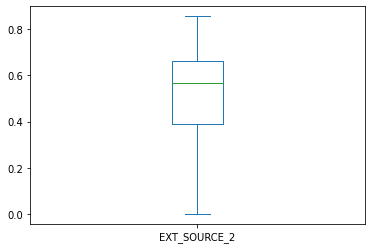

In [16]:
# Handling EXT_SOURCE_2
print(application.EXT_SOURCE_2.describe())
print("="*50)
application.EXT_SOURCE_2.plot.box()
print("="*50)
print("Percentage of negative values", len(application[application.EXT_SOURCE_2 < 0].EXT_SOURCE_2) / len(application.EXT_SOURCE_2) * 100)


# We see there are some extreme negative values, we will replace them with mean
# Also more than 75 percentile of vaues is less than 1, we will replace extreme values with mean
application.loc[application.EXT_SOURCE_2 < 0, "EXT_SOURCE_2"] = application.EXT_SOURCE_2.mean()
application.loc[application.EXT_SOURCE_2 > 1, "EXT_SOURCE_2"] = application.EXT_SOURCE_2.mean()

<AxesSubplot:>

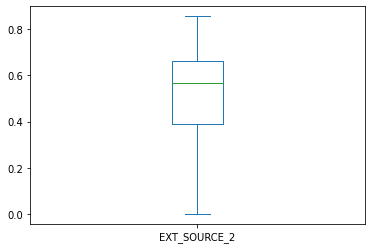

In [17]:
# EXT_SOURCE_2 after cleanup
application.EXT_SOURCE_2.plot.box()

count    164917.000000
mean          0.510767
std           0.194768
min           0.000527
25%           0.370650
50%           0.535276
75%           0.667458
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


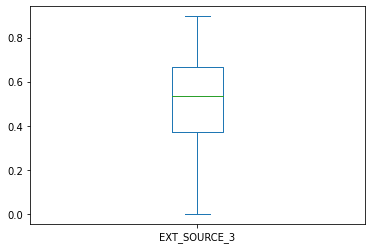

In [18]:
# Handling EXT_SOURCE_3
print(application.EXT_SOURCE_3.describe())
print("="*50)
application.EXT_SOURCE_3.plot.box()
print("="*50)

# We see a small pecentage of value is greter than 2, we will replace them with mean
# We will replace all missing values with mean
application.loc[application.EXT_SOURCE_3.isnull(), "EXT_SOURCE_3"] = application.EXT_SOURCE_3.mean()
application.loc[application.EXT_SOURCE_3 > 1, "EXT_SOURCE_3"] = application.EXT_SOURCE_3.mean()

<AxesSubplot:>

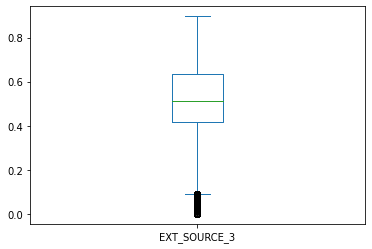

In [19]:
# EXT_SOURCE_3 after cleanup
application.EXT_SOURCE_3.plot.box()

count    177980.000000
mean          1.892662
std           1.865064
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

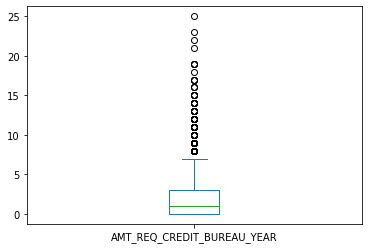

In [21]:
# AMT_REQ_CREDIT_BUREAU_YEAR
application.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box()
application.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

# Based on the box plot we see there are no outlier, we can impute missing values using median

In [22]:
# Fill AMT_REQ_CREDIT_BUREAU_YEAR missing values with 'median'
application.AMT_REQ_CREDIT_BUREAU_YEAR = application.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(application.AMT_REQ_CREDIT_BUREAU_YEAR.median())

count    177980.000000
mean          0.264412
std           0.611494
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0.0    80.981571
1.0    12.748062
2.0     5.403978
3.0     0.651197
4.0     0.171929
5.0     0.024722
6.0     0.012361
7.0     0.003371
8.0     0.002809
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


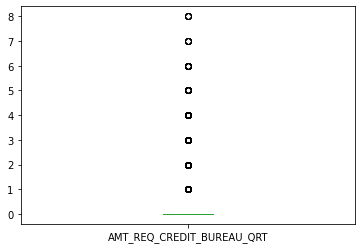

In [23]:
# AMT_REQ_CREDIT_BUREAU_QRT

application.AMT_REQ_CREDIT_BUREAU_QRT.plot.box()
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_QRT.describe())
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True) * 100)
print("="* 50)

# Based in the box plot result, We see that most of the values are are less than 50
# we will replace all the missing values as well as values greater than 50 with most occuring value which is 0.00 (82 percent)

In [24]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT outliers
# Fill missing values using mode

application.AMT_REQ_CREDIT_BUREAU_QRT = application.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])
application.loc[application.AMT_REQ_CREDIT_BUREAU_QRT > 50, "AMT_REQ_CREDIT_BUREAU_QRT"] = application.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]

count    177980.000000
mean          0.265732
std           0.909101
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0.0     83.589167
1.0     12.450275
2.0      2.015395
3.0      0.757950
4.0      0.384875
5.0      0.220811
6.0      0.130914
7.0      0.113496
9.0      0.075289
8.0      0.064052
10.0     0.050567
11.0     0.048882
13.0     0.029217
12.0     0.028093
14.0     0.011799
15.0     0.010113
16.0     0.009552
17.0     0.004495
18.0     0.002809
19.0     0.001124
24.0     0.000562
23.0     0.000562
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


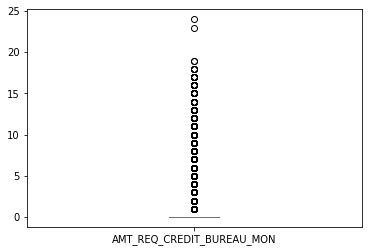

In [25]:
# AMT_REQ_CREDIT_BUREAU_MON

application.AMT_REQ_CREDIT_BUREAU_MON.plot.box()
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_MON.describe())
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True) * 100)
print("="* 50)

# Based in the box plot result, We see that almost 75 percentile value is close to 0
# we will replace all the missing values as well as value with most occuring value which is 0.00 (83 percent)

In [26]:
# Handling AMT_REQ_CREDIT_BUREAU_MON outliers
# Fill missing values using mode

application.AMT_REQ_CREDIT_BUREAU_MON = application.AMT_REQ_CREDIT_BUREAU_MON.fillna(application.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])

count    177980.000000
mean          0.034217
std           0.205930
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0.0    96.819867
1.0     3.052028
2.0     0.075851
3.0     0.021913
4.0     0.014608
6.0     0.008990
5.0     0.004495
8.0     0.001686
7.0     0.000562
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


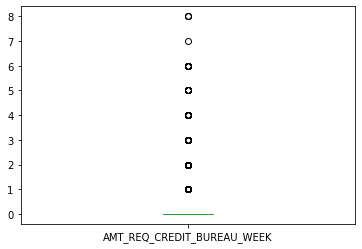

In [27]:
# AMT_REQ_CREDIT_BUREAU_WEEK

application.AMT_REQ_CREDIT_BUREAU_WEEK.plot.box()
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_WEEK.describe())
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True) * 100)
print("="* 50)

# Based in the box plot result, We see that almost 75 percentile value is close to 0
# we will replace all the missing values as well as value with most occuring value which is 0.00 (96 percent)

In [28]:
# Handling AMT_REQ_CREDIT_BUREAU_WEEK outliers
# Fill missing values using mode

application.AMT_REQ_CREDIT_BUREAU_WEEK = application.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(application.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])

count    177980.000000
mean          0.007186
std           0.114707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0.0    99.432521
1.0     0.491628
2.0     0.039330
3.0     0.015732
4.0     0.012361
5.0     0.003371
6.0     0.003371
9.0     0.001124
8.0     0.000562
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


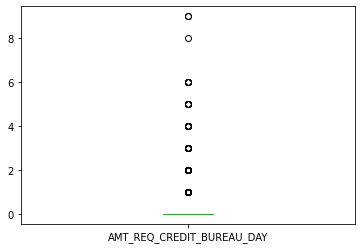

In [29]:
# AMT_REQ_CREDIT_BUREAU_DAY

application.AMT_REQ_CREDIT_BUREAU_DAY.plot.box()
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_DAY.describe())
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True) * 100)
print("="* 50)

# Based in the box plot result, We see that almost 75 percentile value is close to 0
# we will replace all the missing values as well as value with most occuring value which is 0.00 (99 percent)

In [30]:
# Handling AMT_REQ_CREDIT_BUREAU_DAY outliers
# Fill missing values using mode

application.AMT_REQ_CREDIT_BUREAU_DAY = application.AMT_REQ_CREDIT_BUREAU_DAY.fillna(application.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])

count    177980.000000
mean          0.006467
std           0.085253
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0.0    99.389257
1.0     0.580402
2.0     0.025284
3.0     0.004495
4.0     0.000562
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


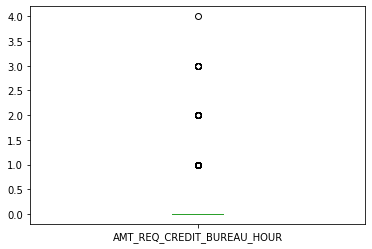

In [31]:
# AMT_REQ_CREDIT_BUREAU_HOUR

application.AMT_REQ_CREDIT_BUREAU_HOUR.plot.box()
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_HOUR.describe())
print("="* 50)
print(application.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True) * 100)
print("="* 50)

# Based in the box plot result, We see that almost 75 percentile value is close to 0
# we will replace all the missing values as well as value with most occuring value which is 0.00 (99 percent)

In [32]:
# Handling AMT_REQ_CREDIT_BUREAU_HOUR outliers
# Fill missing values using mode

application.AMT_REQ_CREDIT_BUREAU_HOUR = application.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(application.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])

In [33]:
missing_values = application.isnull().sum()/len(application.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

# We see the below columns have very small precentage of missing values
# We can ignore these missing values for now as the percentage is very small

NAME_TYPE_SUITE                0.409669
DEF_60_CNT_SOCIAL_CIRCLE       0.331914
OBS_60_CNT_SOCIAL_CIRCLE       0.331914
DEF_30_CNT_SOCIAL_CIRCLE       0.331914
OBS_30_CNT_SOCIAL_CIRCLE       0.331914
EXT_SOURCE_2                   0.221114
AMT_GOODS_PRICE                0.081156
AMT_ANNUITY                    0.003888
DAYS_LAST_PHONE_CHANGE         0.000972
CNT_FAM_MEMBERS                0.000972
REG_REGION_NOT_LIVE_REGION     0.000486
FLAG_DOCUMENT_4                0.000486
REGION_RATING_CLIENT           0.000486
REGION_RATING_CLIENT_W_CITY    0.000486
WEEKDAY_APPR_PROCESS_START     0.000486
HOUR_APPR_PROCESS_START        0.000486
REG_CITY_NOT_WORK_CITY         0.000486
REG_REGION_NOT_WORK_REGION     0.000486
LIVE_REGION_NOT_WORK_REGION    0.000486
FLAG_DOCUMENT_3                0.000486
FLAG_DOCUMENT_6                0.000486
LIVE_CITY_NOT_WORK_CITY        0.000486
ORGANIZATION_TYPE              0.000486
FLAG_DOCUMENT_2                0.000486
FLAG_DOCUMENT_5                0.000486


In [34]:
# We will create a function to check if all the values are numeric
def check_if_not_numeric_column(inp):
  invalid_flag = []
  invalid_flag_with_percentage = []
  for item in inp:
    if not np.issubdtype(application[item].dtype, np.number):
      invalid_flag.append(item)

  for cols in invalid_flag:
    invalid_flag_with_percentage.append(cols + " Perecenage of invalid values " + str(len(application[(pd.to_numeric(application[cols], errors='coerce').isna() == True) & (application[cols].isna() == False) ][cols]) / len(application[cols]) * 100))

  return invalid_flag_with_percentage

In [35]:
# We will create a function to check if all the values in flag are 0's and 1's
def check_flag_values_valid(inp):
  invalid_flag = []
  invalid_flag_with_percentage = []
  for item in inp:
    if not len(application[(application[item].isin([0.0, 1.0])) & (application[item] == np.NaN) ]) == 0:
      invalid_flag.append(item)

  for cols in invalid_flag:
    invalid_flag_with_percentage.append(cols + " Perecenage of invalid values " + str(len(application[(application[cols] != 0) & (application[cols] != 1)]) / len(application[cols]) * 100))

  return invalid_flag_with_percentage

In [36]:
# We will create a function to update invalid values to NaN
def update_invalid_values(inp):
  for item in inp:
    application[item] =  pd.to_numeric(application[item], errors='coerce')

In [37]:
# We will create a function to update invalid values to NaN
def update_non_zero_one_values(inp):
  for item in inp:
    application.loc[(application[item] != 0.0) & (application[item] != 1.0), [item]] = np.NaN

In [38]:
# Now lets check the columns FLAG_DOCUMENT_X & FLAG_X
# check if FLAG_DOCUMENT_X & FLAG_X is numeric


flag_cols = ["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", 
        "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", 
        "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21" ]

print(check_if_not_numeric_column(flag_cols))
print("="* 50)
print("="* 50)

other_flag_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
print(check_if_not_numeric_column(other_flag_cols))

# We see all the FLAG_DOCUMENT_X has numeric values
# But these are some non numeric values in FLAG_X but the percentage is very low, we will replace them with NaN

[]
[]


In [39]:
# Update invalid values to NaN

update_invalid_values(flag_cols)
update_invalid_values(other_flag_cols)

In [40]:
# Now lets check the columns FLAG_DOCUMENT_X & FLAG_X
# check if FLAG_DOCUMENT_X & FLAG_X is 0's and 1's

print(check_flag_values_valid(flag_cols))

print("="* 50)
print("="* 50)

print(check_flag_values_valid(other_flag_cols))

# We see a very small percentage of values are invalid we will replace then with NaN

[]
[]


In [41]:
# Update non 0 / 1 values to NaN

update_non_zero_one_values(flag_cols)
update_non_zero_one_values(other_flag_cols)

In [42]:
# Describe numeric columns
# Observe the data for further analysis of Numerical columns
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,205776.000000,205776.000000,205776.000000,2.057760e+05,2.057760e+05,205768.000000,2.056090e+05,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205774.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,2.053210e+05,205776.000000,205093.000000,205093.000000,205093.000000,205093.000000,205774.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205775.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000,205776.000000
mean,219307.532069,0.081224,0.417532,1.689808e+05,5.992010e+05,27124.104261,5.384936e+05,0.020873,-16035.436868,63787.411112,-4981.681537,-2994.275606,0.999995,0.819969,0.199178,0.998061,0.280319,0.056897,2.154009,2.052567,2.031709,12.065042,0.015230,0.050929,0.040588,0.078212,0.230786,0.179662,5.139957e-01,0.510767,1.423110,0.144110,1.406235,0.100101,-961.413901,0.000039,0.710519,0.000092,0.015177,0.088072,0.000233,0.081327,0.003863,0.000029,0.003931,0.000010,0.003504,0.002974,0.001215,0.010011,0.000248,0.008096,0.000559,0.000481,0.000316,0.005593,0.006215,0.029595,0.229837,0.228695,1.772082
std,68849.355217,0.273180,0.723806,2.800495e+05,4.027931e+05,14543.650331,3.698313e+05,0.013838,4368.981019,141248.252566,3522.522764,1511.057129,0.002204,0.384214,0.399383,0.043991,0.449156,0.231646,0.912229,0.509364,0.502930,3.264445,0.122468,0.219854,0.197334,0.268505,0.421337,0.383907,1.914297e-01,0.174363,2.439901,0.449954,2.418381,0.363310,826.501800,0.006235,0.453523,0.009609,0.122256,0.283400,0.015271,0.273337,0.062037,0.005400,0.062578,0.003118,0.059089,0.054454,0.034835,0.099553,0.015741,0.089614,0.023634,0.021929,0.017770,0.079317,0.106707,0.191874,0.850338,0.575833,1.761162
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,-23738.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159567.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19684.000000,-2756.000000,-7468.000000,-4300.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.

In [43]:
# Lets verify if DAYS_X columns have numeric value
days_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
check_if_not_numeric_column(days_columns)

# Few column have non numeric values, we will replace it with NAN

[]

In [44]:
# Replace non numeric with NaN
update_invalid_values(days_columns)

In [45]:
# We see few columns have negative values, Let's convert all such values to postive
for col in days_columns:
    application[col] = abs(application[col])

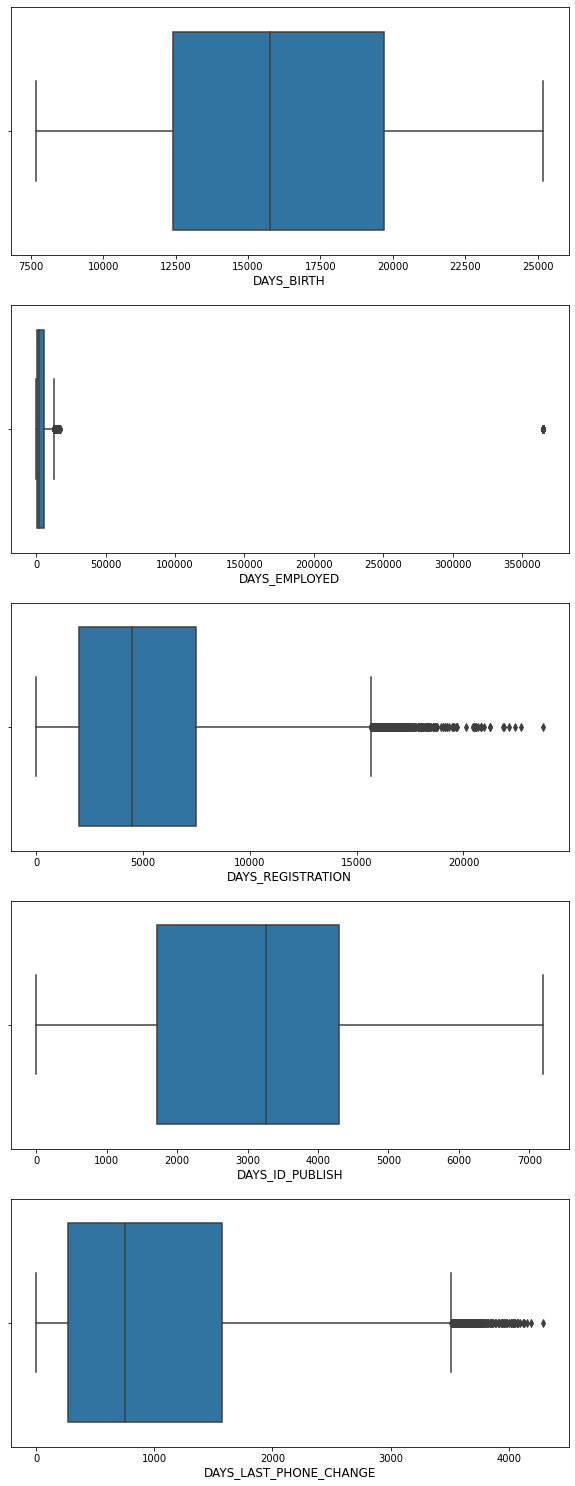

In [46]:
fig = plt.figure(figsize=(10, 20))
for idx, item in enumerate(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']):
    plt.subplot(5,1,idx+1)
    plt.subplots_adjust(bottom=9, top=10)
    plt.xlabel(item, fontsize=12, labelpad=2)
    sns.boxplot(application[item])

plt.show()

# Looking at these plots, we see most of the DAYS column are within the acceptable range except DAYS_EMPLOYED
# We need to treat outlier for DAYS_EMPLOYED

In [47]:
# DAYS_EMPLOYED
# we see some extreme values for DAYS_EMPLOYED
# Lets check all the values where DAYS_EMPLOYED > 25000

application[application.DAYS_EMPLOYED > 25000].DAYS_EMPLOYED.value_counts()

365243    37037
Name: DAYS_EMPLOYED, dtype: int64

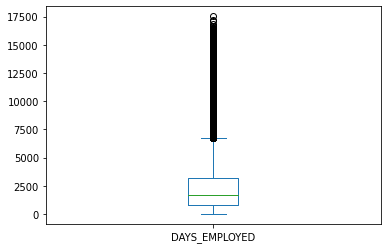

In [48]:
# Lets check the box plot excluding the extreme values
application[application.DAYS_EMPLOYED < 365243].DAYS_EMPLOYED.plot.box()

# After excluding the extreme the plot looks continous
# Lets replace the extreme values wthe mean (After excluding extreme)

extreme_value = application.DAYS_EMPLOYED.value_counts().index.tolist()[0]

application.loc[application.DAYS_EMPLOYED >= extreme_value, "DAYS_EMPLOYED"] = int(application[application.DAYS_EMPLOYED < extreme_value].DAYS_EMPLOYED.mean())

In [49]:
# Let check AMT_X cols

amt_x_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
check_if_not_numeric_column(amt_x_cols)

# We see some cols have non numeric values, we will replace them with NaN

[]

In [50]:
update_invalid_values(amt_x_cols)

In [51]:
# Convert FLAG_OWN_X into numerical column
application['FLAG_OWN_REALTY'] = application['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else np.NaN))
application['FLAG_OWN_CAR'] = application['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else np.NaN))

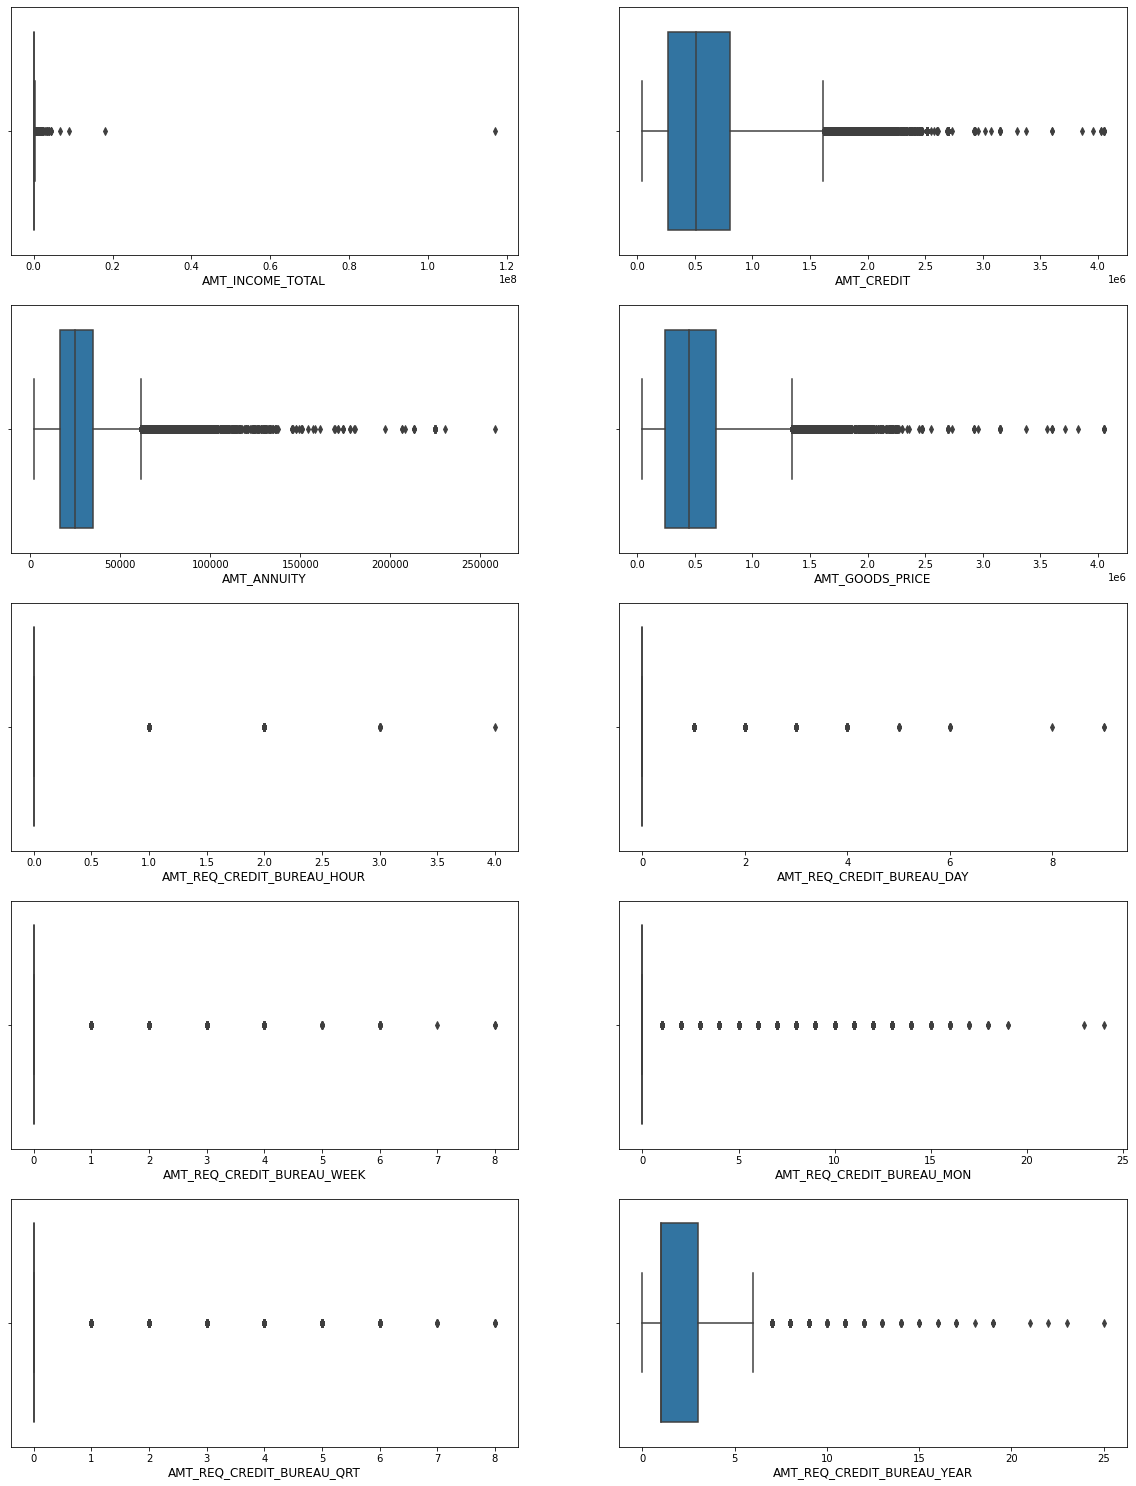

In [52]:
# Now let's analyse all the AMT_X cols



fig = plt.figure(figsize=(20, 20))
for idx, item in enumerate(amt_x_cols):
    plt.subplot(5,2,idx+1)
    plt.subplots_adjust(bottom=9, top=10)
    plt.xlabel(item, fontsize=12, labelpad=2)
    sns.boxplot(application[item])

plt.show()

# Looking at these plots, we see most of the AMT_X column are within the acceptable range except AMT_INCOME_TOTAL
# We need to treat outlier for AMT_INCOME_TOTAL

In [53]:
application.AMT_INCOME_TOTAL.describe()

# As we see there are some extreme values, For simplicity we will create bins of Income

count    2.057760e+05
mean     1.689808e+05
std      2.800495e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
bins = [0, 99000,  150000,  300000, 750000, 1000000]
slots = ['Very Low', 'Low', 'Medium','High', 'Very High']

application['AMT_INCOME_RANGE'] = pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=slots)

In [55]:
bins = [0, 365*10, 365*20, 365*30, 365*40, 365*50, 365*60, 365*70, 365*80, 365*90, 365*100]
slots = ['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '> 90']

bins_five = [0, 365*5, 365*10, 365*15, 365*20, 365*25, 365*30, 365*35, 365*40, 365*45, 365*50]
slots_five = ['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30', '35 - 40', '45 - 50', '55 - 60', '> 90']

application['DAYS_BIRTH_RANGE'] = pd.cut(application['DAYS_BIRTH'],bins,labels=slots)
application['DAYS_EMPLOYED_RANGE'] = pd.cut(application['DAYS_EMPLOYED'],bins_five,labels=slots_five)
application['DAYS_REGISTRATION_RANGE'] = pd.cut(application['DAYS_REGISTRATION'],bins_five,labels=slots_five)
application['DAYS_ID_PUBLISH_RANGE'] = pd.cut(application['DAYS_ID_PUBLISH'],bins_five,labels=slots_five)
application['DAYS_LAST_PHONE_CHANGE_RANGE'] = pd.cut(application['DAYS_LAST_PHONE_CHANGE'],bins_five,labels=slots_five)

In [56]:
# Check if target variable have invalid values
check_if_not_numeric_column(['TARGET'])
update_invalid_values(['TARGET'])
# As the percentage of invalid value is small we will set to NaN

check_flag_values_valid(['TARGET'])
update_non_zero_one_values(['TARGET'])
# As the percentage of non 0 and 1 value is small we will set to NaN

application.TARGET = application.TARGET.astype(int)

In [57]:
# Replace the invalid values to NaN

reg_live = ['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
check_if_not_numeric_column(reg_live)
update_invalid_values(reg_live)
check_flag_values_valid(reg_live)
update_non_zero_one_values(reg_live)

In [58]:
# CODE_GENDER invalid values cleanup
application.loc[~application.CODE_GENDER.isin(['M','F']), "CODE_GENDER"] = np.NaN

In [59]:
# NAME_TYPE_SUITE invalid values cleanup
# Here we will replace all values which are repeated less than 50 time with most occured value
most_occuring_values = application.NAME_TYPE_SUITE.value_counts().loc[lambda x: x> 50].index
mode_value = application.NAME_TYPE_SUITE.mode()[0]
print(most_occuring_values)
application.NAME_TYPE_SUITE = application.NAME_TYPE_SUITE.apply(lambda x: x if x in most_occuring_values else mode_value)

Index(['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B',
       'Other_A', 'Group of people'],
      dtype='object')


In [60]:
# NAME_TYPE_SUITE invalid values cleanup
# Here we will replace all values which are repeated less than 8 time with most occured value
most_occuring_values = application.NAME_INCOME_TYPE.value_counts().loc[lambda x: x> 8].index
mode_value = application.NAME_INCOME_TYPE.mode()[0]
print(most_occuring_values)
application.NAME_INCOME_TYPE = application.NAME_INCOME_TYPE.apply(lambda x: x if x in most_occuring_values else mode_value)

Index(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Unemployed', 'Student'],
      dtype='object')


In [61]:
# NAME_EDUCATION_TYPE invalid values cleanup
# Here we will replace all values which are repeated less than 4 time with most occured value
most_occuring_values = application.NAME_EDUCATION_TYPE.value_counts().loc[lambda x: x> 4].index
mode_value = application.NAME_EDUCATION_TYPE.mode()[0]
print(most_occuring_values)
application.NAME_EDUCATION_TYPE = application.NAME_EDUCATION_TYPE.apply(lambda x: x if x in most_occuring_values else mode_value)

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object')


In [62]:
# NAME_FAMILY_STATUS invalid values cleanup
# Here we will replace all values which are repeated less than 9 time with most occured value
most_occuring_values = application.NAME_FAMILY_STATUS.value_counts().loc[lambda x: x> 9].index
mode_value = application.NAME_FAMILY_STATUS.mode()[0]
print(most_occuring_values)
application.NAME_FAMILY_STATUS = application.NAME_FAMILY_STATUS.apply(lambda x: x if x in most_occuring_values else mode_value)

Index(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'],
      dtype='object')


In [63]:
# NAME_HOUSING_TYPE invalid values cleanup
# Here we will replace all values which are repeated less than 9 time with most occured value
most_occuring_values = application.NAME_HOUSING_TYPE.value_counts().loc[lambda x: x> 9].index
mode_value = application.NAME_HOUSING_TYPE.mode()[0]
print(most_occuring_values)
application.NAME_HOUSING_TYPE = application.NAME_HOUSING_TYPE.apply(lambda x: x if x in most_occuring_values else mode_value)

Index(['House / apartment', 'With parents', 'Municipal apartment',
       'Rented apartment', 'Office apartment', 'Co-op apartment'],
      dtype='object')


In [64]:
# OCCUPATION_TYPE invalid values cleanup
# Here we will replace all values which are repeated less than 15 time with most occured value
most_occuring_values = application.OCCUPATION_TYPE.value_counts().loc[lambda x: x> 15].index
mode_value = application.OCCUPATION_TYPE.mode()[0]
print(most_occuring_values)
application.OCCUPATION_TYPE = application.OCCUPATION_TYPE.apply(lambda x: x if x in most_occuring_values else mode_value)

Index(['Others', 'Laborers', 'Sales staff', 'Core staff', 'Managers',
       'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff',
       'Security staff', 'Cooking staff', 'Cleaning staff',
       'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff',
       'Secretaries', 'Realty agents', 'HR staff', 'IT staff'],
      dtype='object')


In [65]:
# ORGANIZATION_TYPE invalid values cleanup
# Here we will replace all values which are repeated less than 15 time with most occured value
most_occuring_values = application.ORGANIZATION_TYPE.value_counts().loc[lambda x: x> 15].index
mode_value = application.ORGANIZATION_TYPE.mode()[0]
print(most_occuring_values)
application.ORGANIZATION_TYPE = application.ORGANIZATION_TYPE.apply(lambda x: x if x in most_occuring_values else mode_value)

Index(['Business Entity Type 3', 'XNA', 'Self-employed', 'Other', 'Medicine',
       'Business Entity Type 2', 'Government', 'School', 'Trade: type 7',
       'Kindergarten', 'Construction', 'Business Entity Type 1',
       'Transport: type 4', 'Trade: type 3', 'Industry: type 9', 'Security',
       'Industry: type 3', 'Housing', 'Industry: type 11', 'Military', 'Bank',
       'Agriculture', 'Police', 'Postal', 'Transport: type 2',
       'Security Ministries', 'Trade: type 2', 'Restaurant', 'Services',
       'University', 'Industry: type 7', 'Transport: type 3',
       'Industry: type 1', 'Hotel', 'Electricity', 'Industry: type 4',
       'Trade: type 6', 'Industry: type 5', 'Telecom', 'Insurance',
       'Emergency', 'Industry: type 2', 'Advertising', 'Realtor', 'Culture',
       'Trade: type 1', 'Industry: type 12', 'Mobile', 'Legal Services',
       'Cleaning', 'Transport: type 1', 'Industry: type 6',
       'Industry: type 10', 'Religion', 'Industry: type 13', 'Trade: type 4',
  

In [66]:
# convert interger columns to int type
application.CNT_CHILDREN = application.CNT_CHILDREN.astype(int)
application.CNT_FAM_MEMBERS = application.CNT_FAM_MEMBERS.astype("Int64")

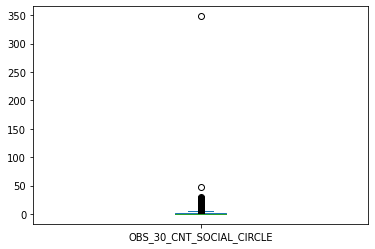

In [67]:
# Lets check the box plot excluding the extreme values
application.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()

# After excluding the extreme the plot looks continous
# Lets replace the extreme values wthe mean (After excluding extreme)

extreme_value = 30
application.loc[application.OBS_30_CNT_SOCIAL_CIRCLE > extreme_value, "OBS_30_CNT_SOCIAL_CIRCLE"] = int(application[application.OBS_30_CNT_SOCIAL_CIRCLE < extreme_value].OBS_30_CNT_SOCIAL_CIRCLE.mean())

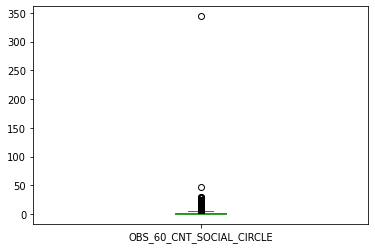

In [68]:
# Lets check the box plot excluding the extreme values
application.OBS_60_CNT_SOCIAL_CIRCLE.plot.box()

# After excluding the extreme the plot looks continous
# Lets replace the extreme values wthe mean (After excluding extreme)

extreme_value = 30
application.loc[application.OBS_60_CNT_SOCIAL_CIRCLE > extreme_value, "OBS_60_CNT_SOCIAL_CIRCLE"] = int(application[application.OBS_60_CNT_SOCIAL_CIRCLE < extreme_value].OBS_60_CNT_SOCIAL_CIRCLE.mean())

# Univariate analysis

In [69]:
sns.set_style('whitegrid')
sns.set_context('talk')

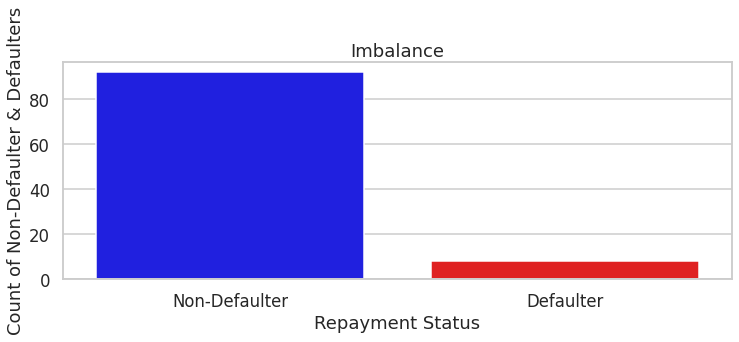

In [70]:
# Now we will perform Imbalance Analysis
unique_values = data = application["TARGET"].value_counts(normalize=True).reset_index() * 100

plt.figure(figsize=(12,4))
x= ['Non-Defaulter','Defaulter']
sns.barplot(data = unique_values, x=x, y ="TARGET",palette= ['b','r'])
plt.xlabel("Repayment Status")
plt.ylabel("Count of Non-Defaulter & Defaulters")
plt.title("Imbalance")
plt.show()

# We can see from the below plot that there are more than 80 percent Non-Defaulter and less than 20 percent Defaulter

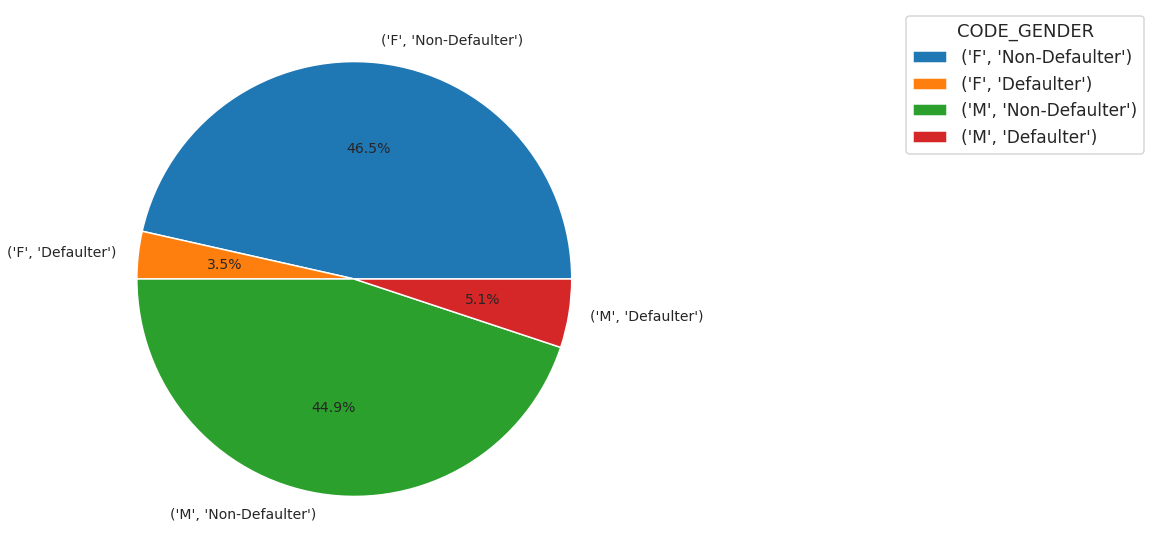

In [71]:
# Using a pie char we will see the percentages of Defaulter vs Non Defaulter

category_vars = ['CODE_GENDER']
for idx, item in enumerate(category_vars):
    category_wise = application.groupby(item)["TARGET"].value_counts(normalize=True)
    category_wise.rename(index={0: 'Non-Defaulter'}, inplace=True)
    category_wise.rename(index={1: 'Defaulter'}, inplace=True)
    plt.figure(figsize=(15,10))
    plt.pie(category_wise, labels=category_wise.index, textprops={'fontsize': 14}, autopct='%1.1f%%')
    plt.legend(title=item, bbox_to_anchor=(1.5, 1), loc='upper left', fontsize = 17)

plt.show()

# We can see that Males are more likely to default than Females

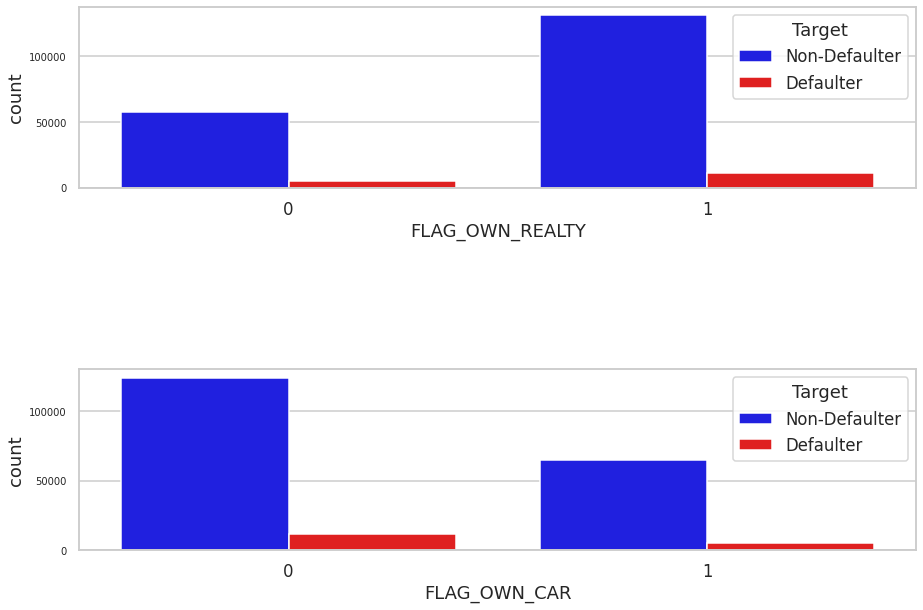

In [72]:
# We will try to find the relavance of each FLAG_OWN_X with target variable

flag_own = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR']

fig = plt.figure(figsize=(15,10))
for idx, item in enumerate(flag_own):
    plt.subplot(2,1,idx+1)
    plt.subplots_adjust(hspace=1)
    plt.yticks(fontsize=10)
    sns.countplot(application[item], hue=application["TARGET"], palette=["b","r"])
    plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])

plt.show()

# We see that the ratio of Defaulter vs Non-Defaulter is almost same, whether or not the FLAG_OWN is present

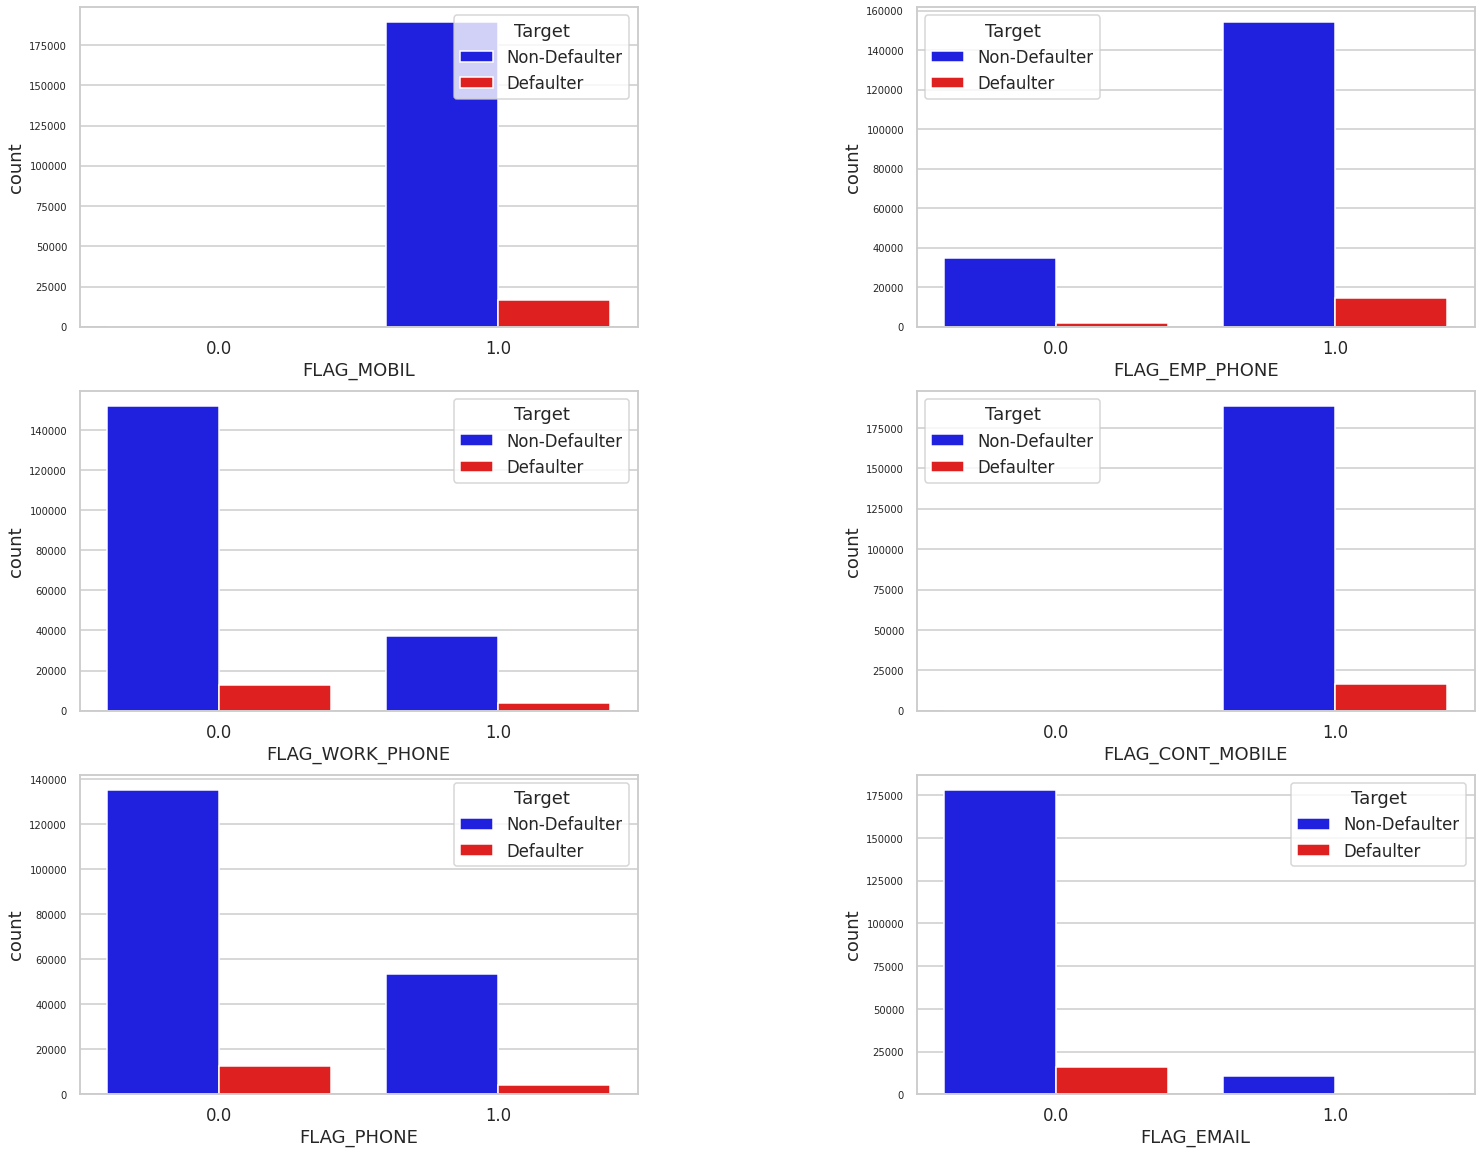

In [73]:
# We will try to find the relavance of each FLAG_X with target variable

fig = plt.figure(figsize=(25,20))
for idx, item in enumerate(other_flag_cols):
    plt.subplot(3,2,idx+1)
    plt.subplots_adjust(wspace=0.5)
    plt.yticks(fontsize=10)
    sns.countplot(application[item], hue=application["TARGET"], palette=["b","r"])
    plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])

plt.show()

# We see that the ratio of Defaulter vs Non-Defaulter is almost same, whether or not the FLAG_X is present

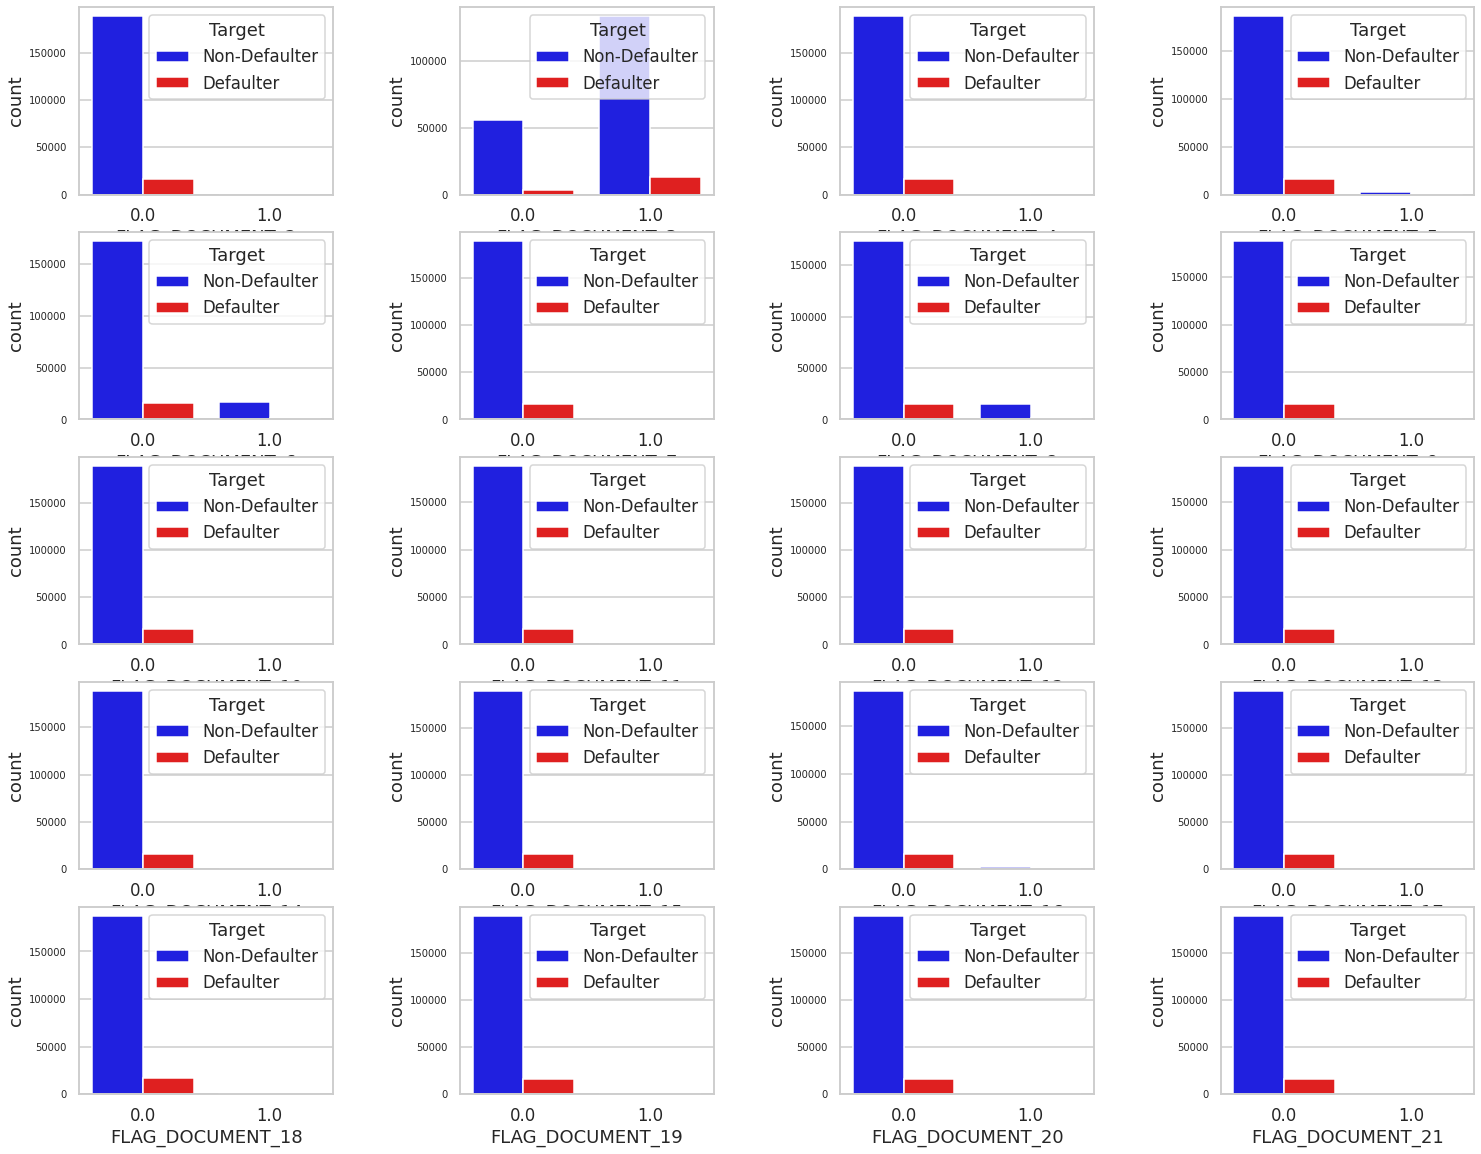

In [74]:
# As FLAG_DOCUMENT_X contains all 0's and 1's
# We will try to find the relavance of each FLAG_DOCUMENT_X with target variable

fig = plt.figure(figsize=(25,20))
for idx, item in enumerate(flag_cols):
    plt.subplot(5,4,idx+1)
    plt.subplots_adjust(wspace=0.5)
    plt.yticks(fontsize=10)
    sns.countplot(application[item], hue=application["TARGET"], palette=["b","r"])
    plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])

plt.show()

# We see that the ratio of Defaulter vs Non-Defaulter is almost same, whether or not the FLAG_DOCUMENT_X has been submitted
# We also see that FLAG_DOCUMENT_3 is the submitted by most of the customers

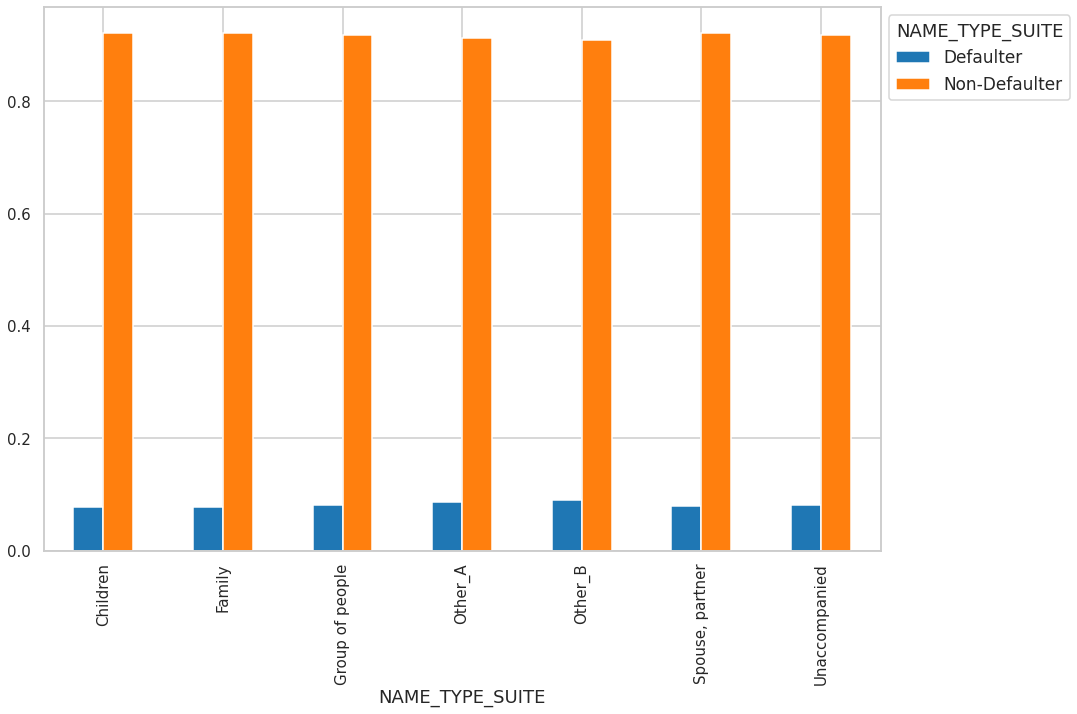

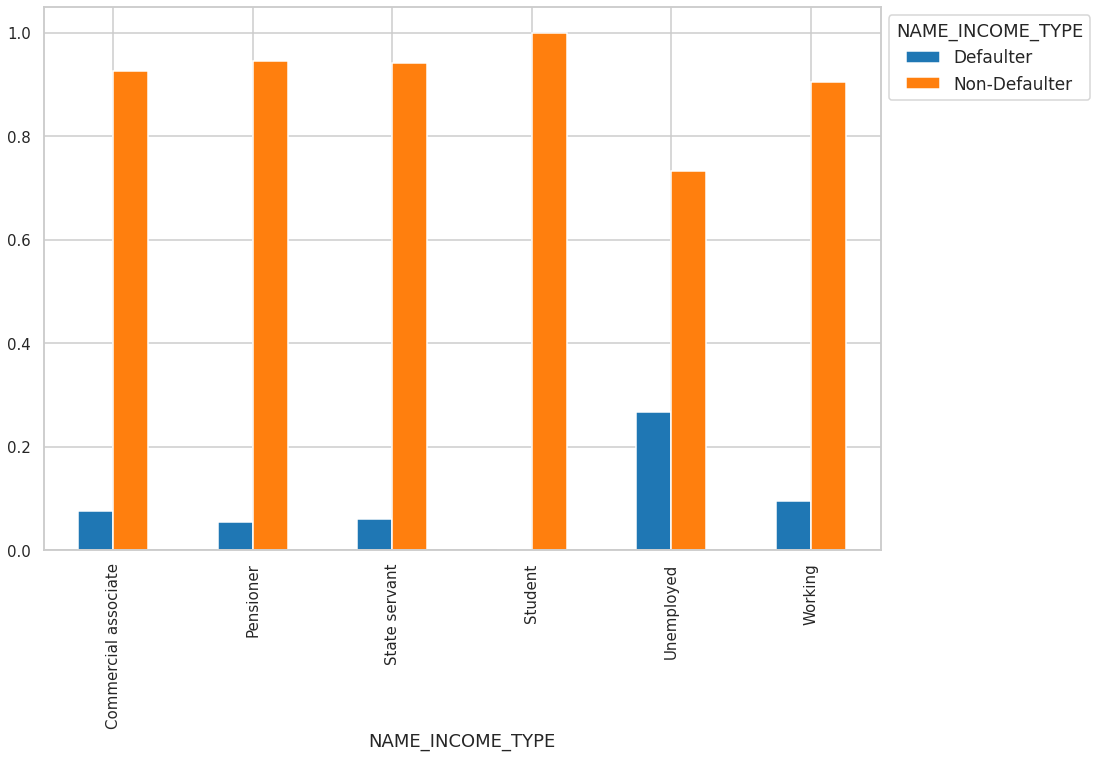

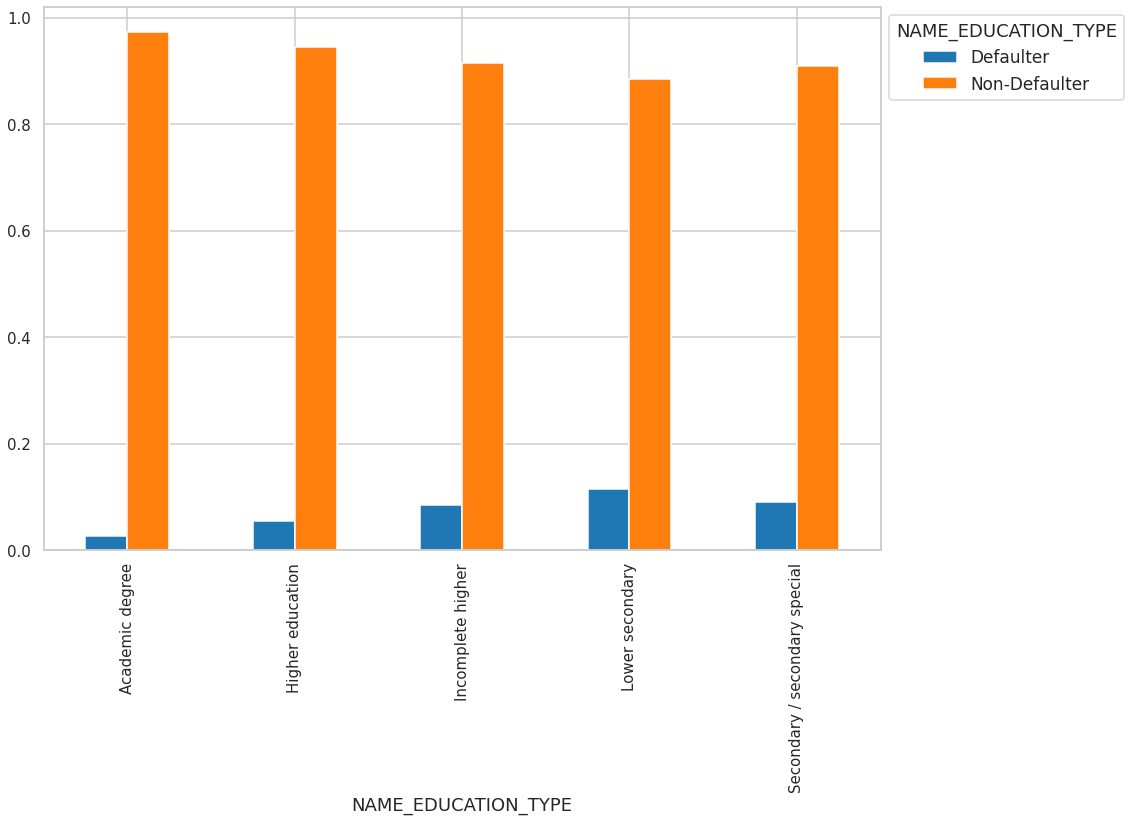

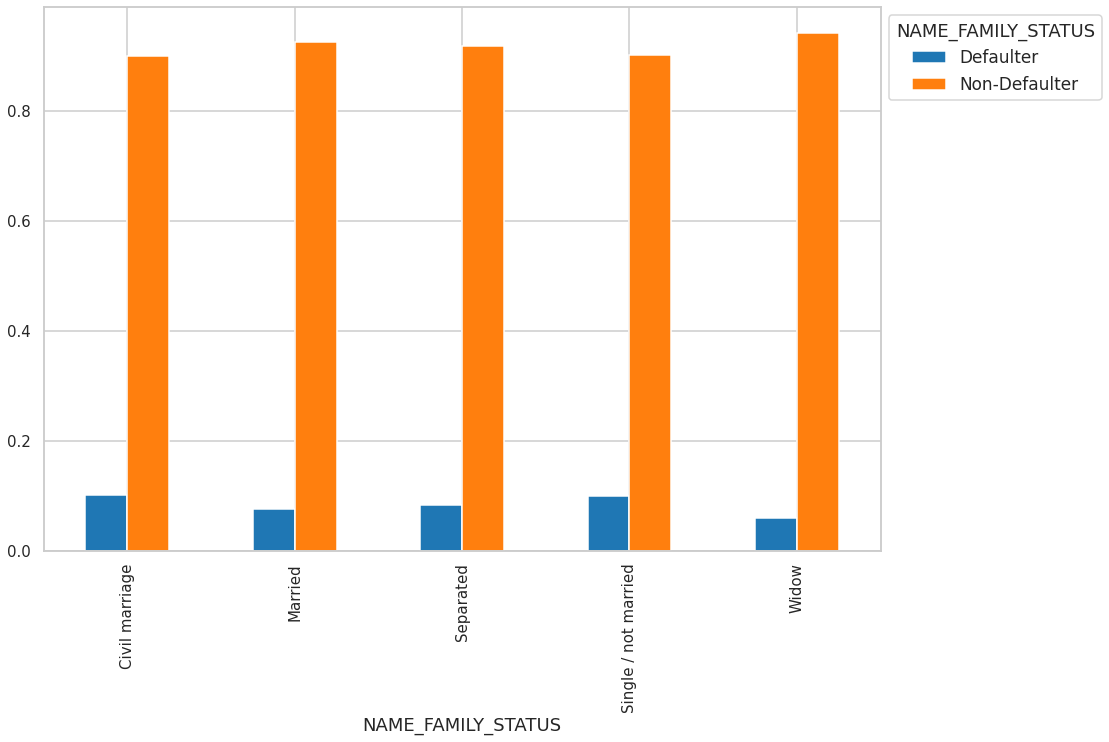

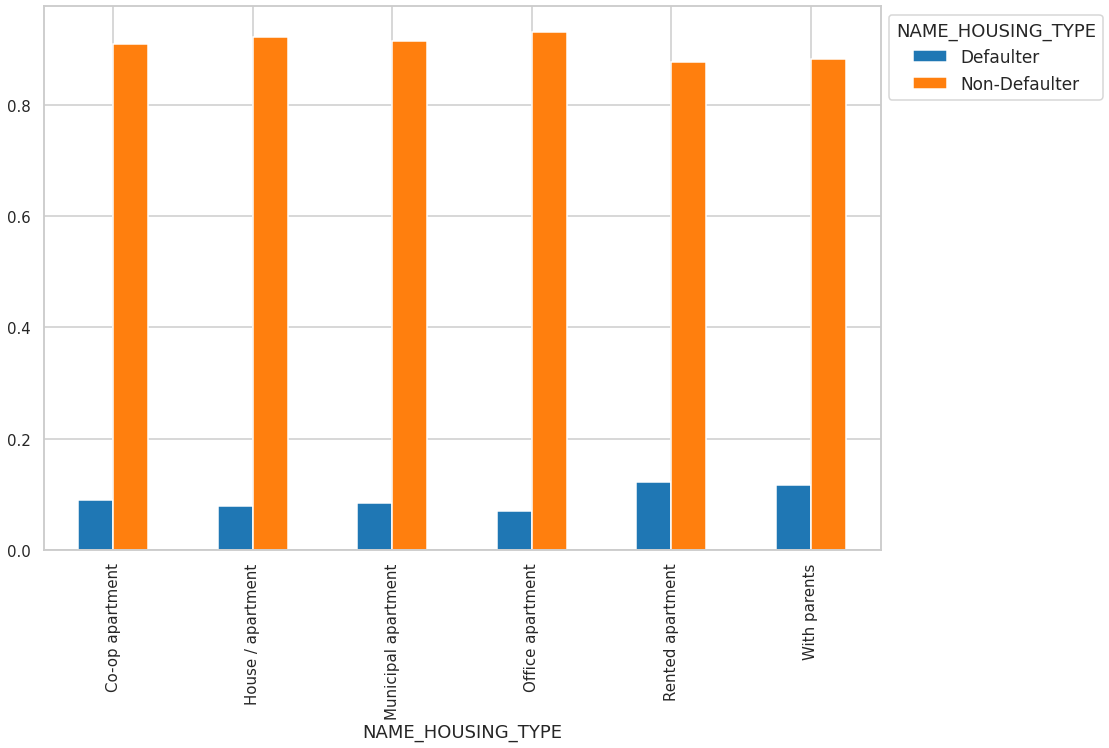

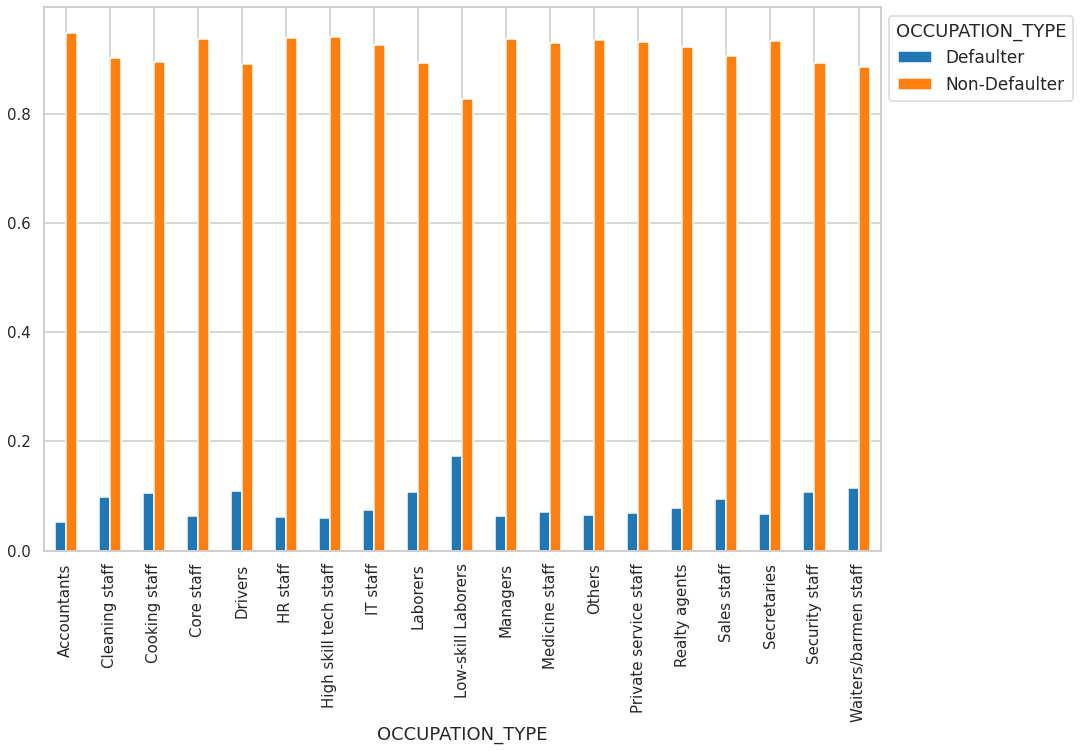

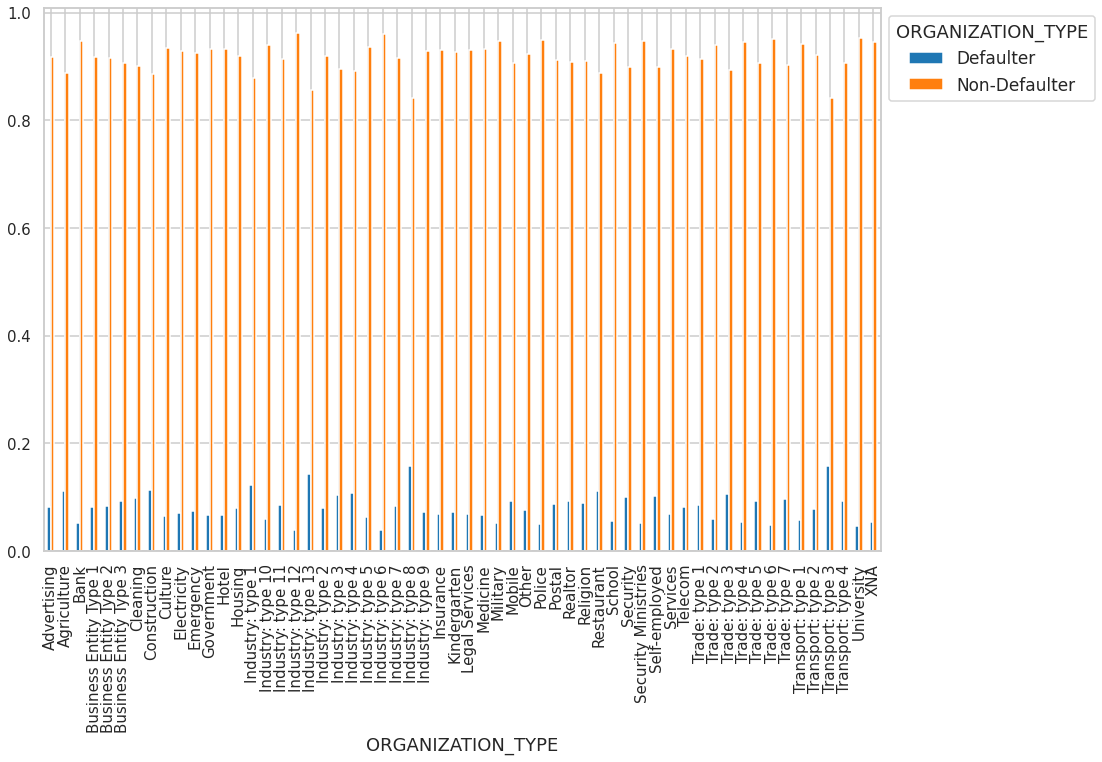

In [75]:
# Using a pie char we will see the percentages of Defaulter vs Non Defaulter

category_vars = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE"]
for idx, item in enumerate(category_vars):
    category_wise = application.groupby(item)["TARGET"].value_counts(normalize=True)
    category_wise.rename(index={0: 'Non-Defaulter'}, inplace=True)
    category_wise.rename(index={1: 'Defaulter'}, inplace=True)
    category_wise.unstack(level='TARGET').plot(kind='bar', figsize=(15,10), fontsize=15)
    plt.legend(title=item, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17)

# We can see that NAME_TYPE_SUITE does not effect the deault rate in any manner
# We see that students and business man are the highest among non defaulter
# Unemployed are the highest among defaulters
# People with Lower secondary degree is more likely to default
# People with Rented apartment are more likely to default
# Low skill labour have higher chances of Defaulting
# Mostly Transport type 3 Organizations has the highest percent of people having payment issues

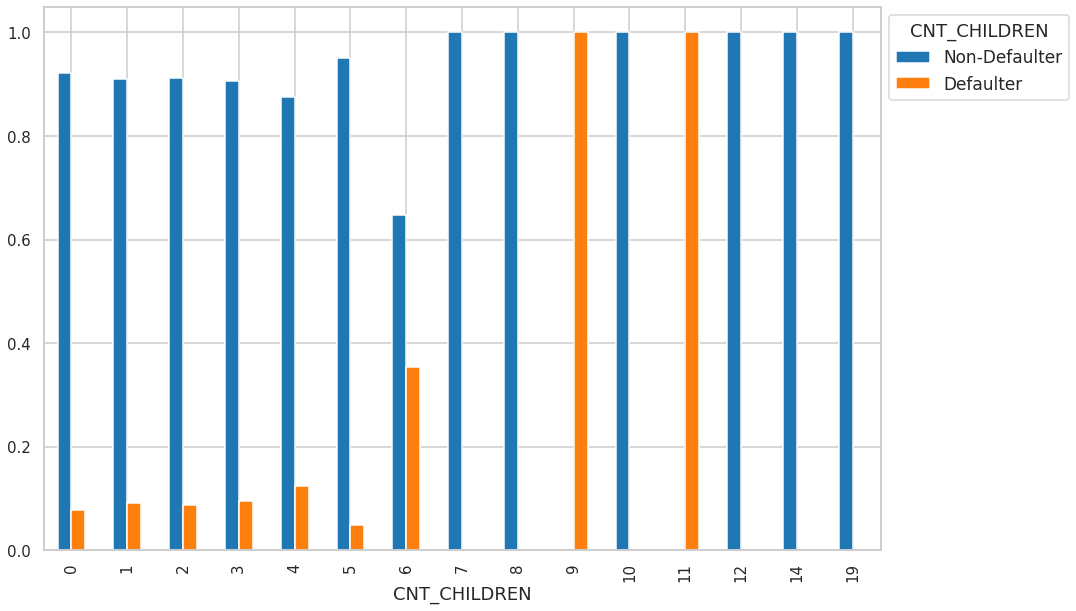

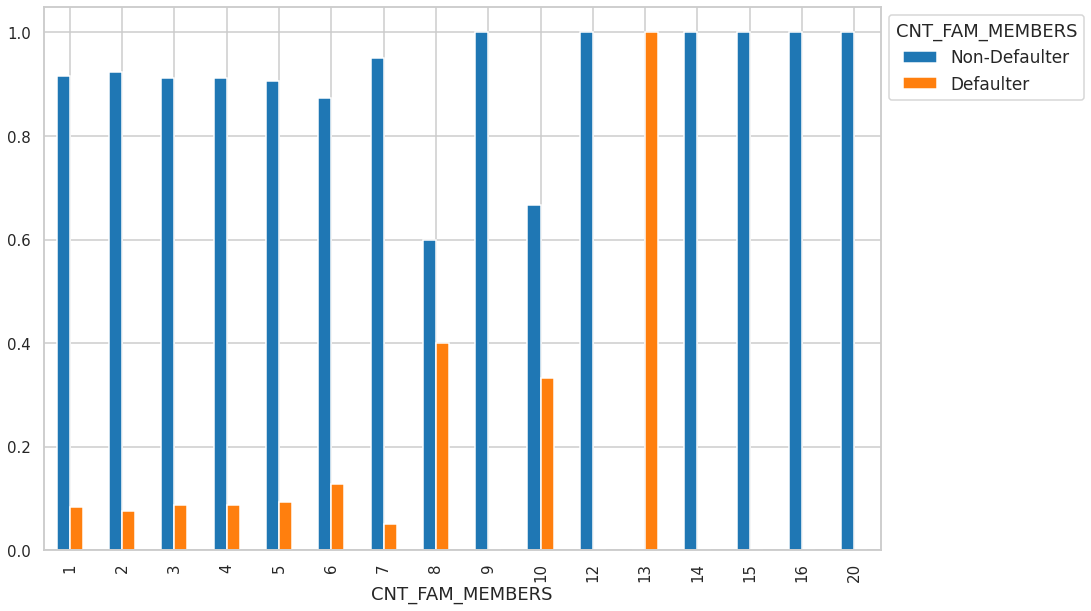

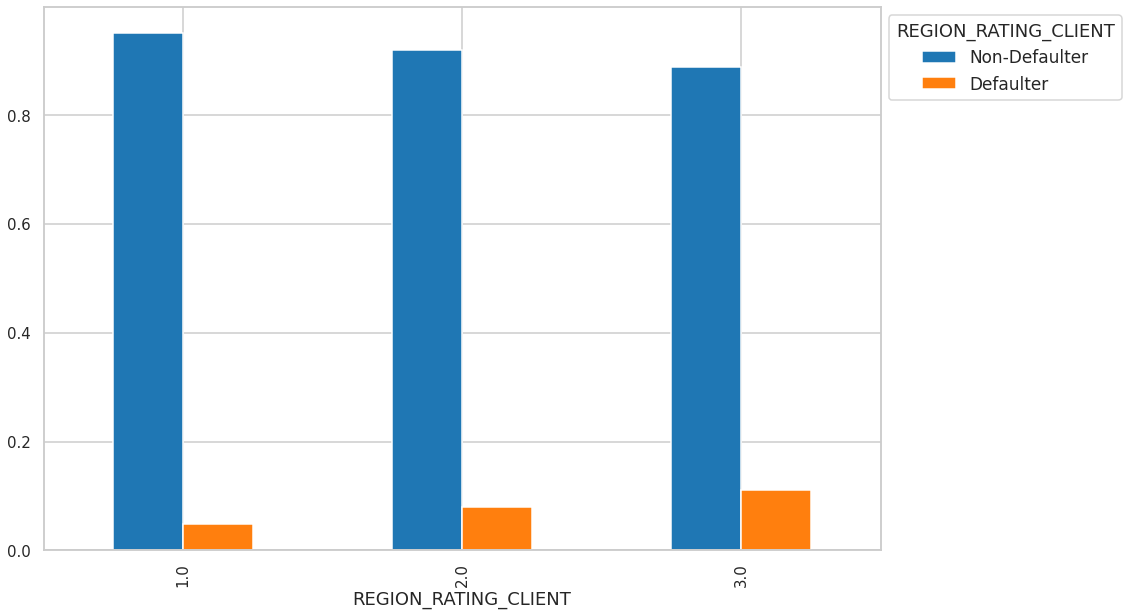

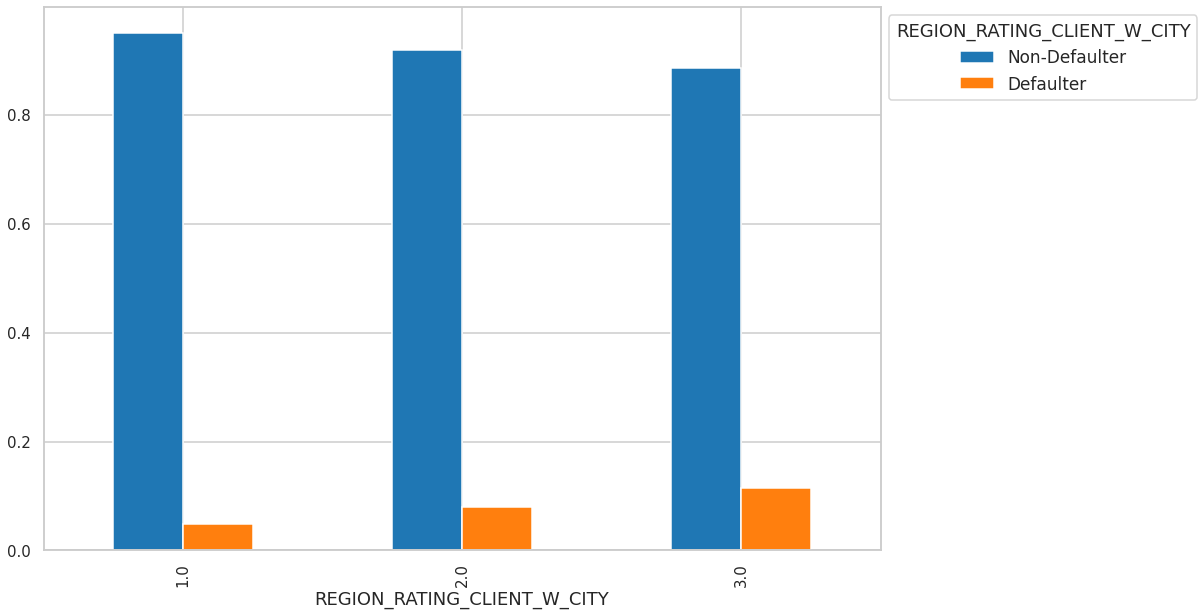

In [76]:
# Using a bar chart we will see the percentages of Defaulter vs Non Defaulter

category_vars = ["CNT_CHILDREN", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY"]
for idx, item in enumerate(category_vars):
    category_wise = application.groupby(item)["TARGET"].value_counts(normalize=True)
    category_wise.unstack(level='TARGET').plot(kind='bar', figsize=(15,10), fontsize=15)
    plt.legend(title=item, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17, labels=["Non-Defaulter", "Defaulter"])

# We see that as the children count increases Default rate increases
# However we must note that we don't have default customer with children 7, 8, 10, 12, 14, 19 one reason could be there might very be few customer in this bracket
# We have similar trend for CNT_FAM_MEMBERS
# Aslo for REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITY we see as the rating goes up the Default rate also goes up and Non-Default rate comes down

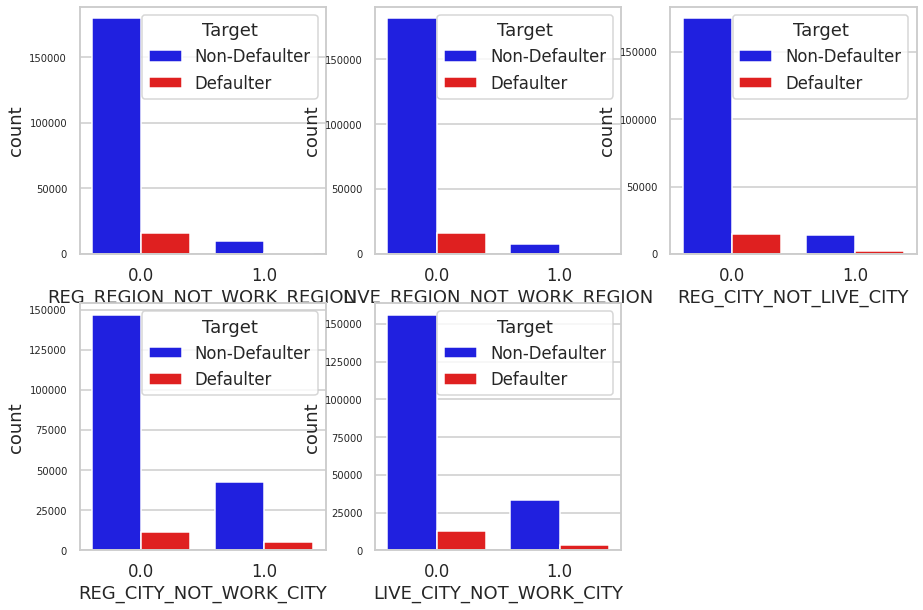

In [77]:
# We will try to find the relavance of each with target variable

flag_own = ["REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]

fig = plt.figure(figsize=(15,10))
for idx, item in enumerate(flag_own):
    plt.subplot(2,3,idx+1)
    plt.yticks(fontsize=10)
    sns.countplot(application[item], hue=application["TARGET"], palette=["b","r"])
    plt.legend(title='Target', labels=['Non-Defaulter', 'Defaulter'])

plt.show()

# We see that the ratio of Defaulter vs Non-Defaulter is almost same

# Bivariate Analysis

In [78]:
# We will perfrom bivariate analysis for Defaulter and Non-Defaulter
non_defaulter = application[application.TARGET == 0]
defaulter = application[application.TARGET == 1]

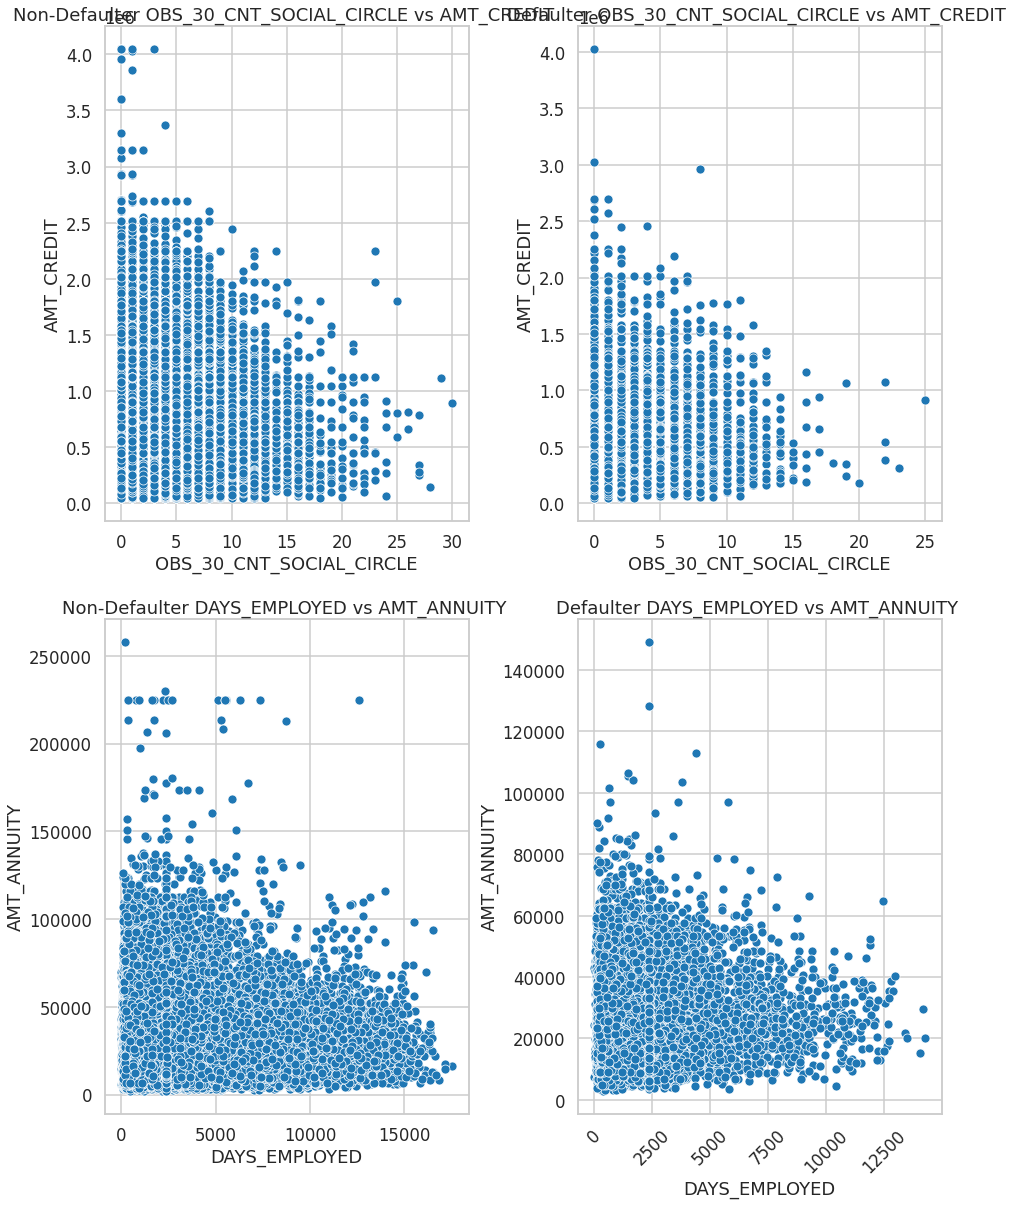

In [79]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(non_defaulter.OBS_30_CNT_SOCIAL_CIRCLE,non_defaulter.AMT_CREDIT)
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')
plt.ylabel('AMT_CREDIT')
plt.title('Non-Defaulter OBS_30_CNT_SOCIAL_CIRCLE vs AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(defaulter.OBS_30_CNT_SOCIAL_CIRCLE,defaulter.AMT_CREDIT)
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')
plt.ylabel('AMT_CREDIT')
plt.title('Defaulter OBS_30_CNT_SOCIAL_CIRCLE vs AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(non_defaulter.DAYS_EMPLOYED,non_defaulter.AMT_ANNUITY)
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('AMT_ANNUITY')
plt.title('Non-Defaulter DAYS_EMPLOYED vs AMT_ANNUITY ')

plt.subplot(2,2,4)
sns.scatterplot(defaulter.DAYS_EMPLOYED,defaulter.AMT_ANNUITY)
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('AMT_ANNUITY')
plt.title('Defaulter DAYS_EMPLOYED vs AMT_ANNUITY ')

plt.xticks(rotation = 45)
plt.show()

# We can see from the below plots that observation of client's social surroundings is not dependent on AMT_CREDIT
# From plot 2 we see that Non-Defaulters are have much higher Annuity compared to Defaulter 


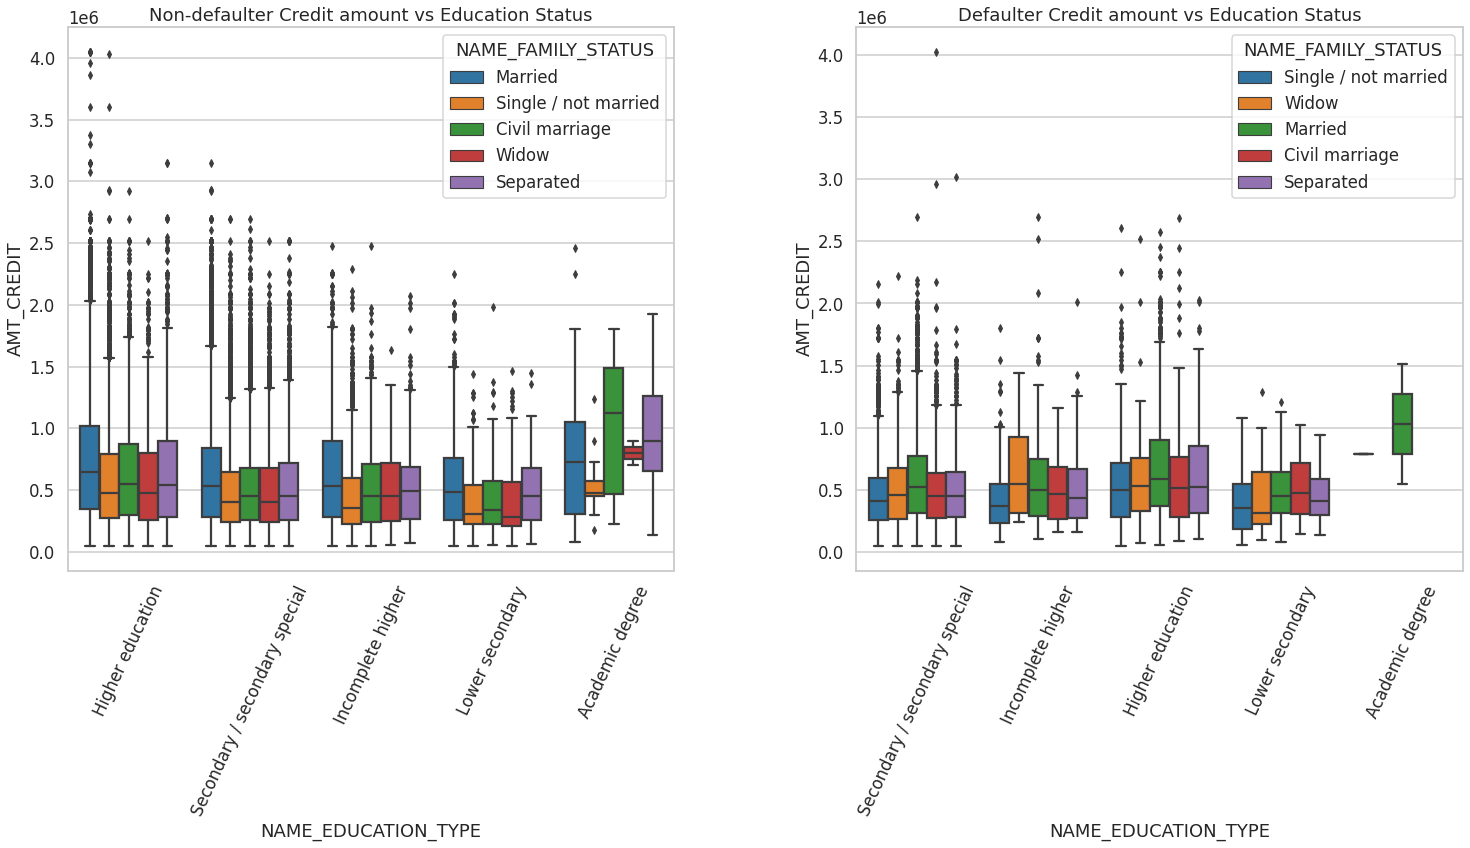

In [80]:
# Box plotting for Credit amount

plt.figure(figsize=(25,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data = non_defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Non-defaulter Credit amount vs Education Status')
plt.xticks(rotation=65)

plt.subplot(122)
sns.boxplot(data = defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Defaulter Credit amount vs Education Status')
plt.xticks(rotation=65)
plt.show()

# From the above plot we observe that
# Married customer with higher education are having the highest credit limits
# Customer with higher education are less likely to default
# Married customer with Academic degree are more likely to default

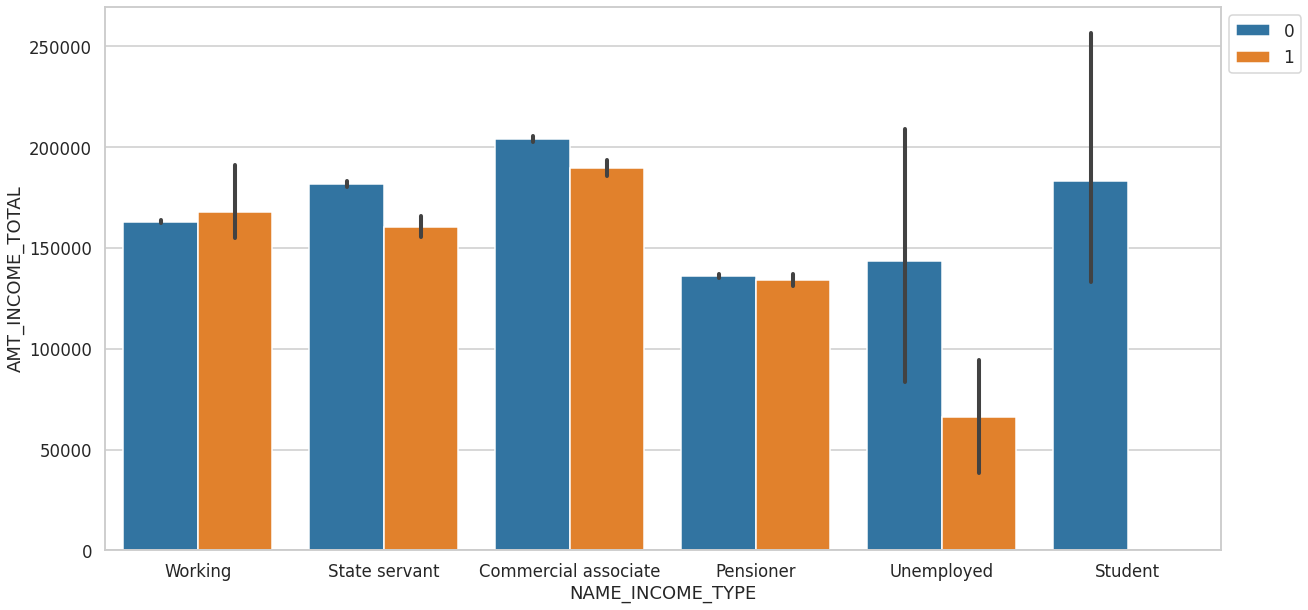

In [81]:
fig = plt.figure(figsize=(20,10))
sns.barplot(data=application, x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", hue='TARGET')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17)
plt.show()

# We see that Businessman has the highest income also the least default rate

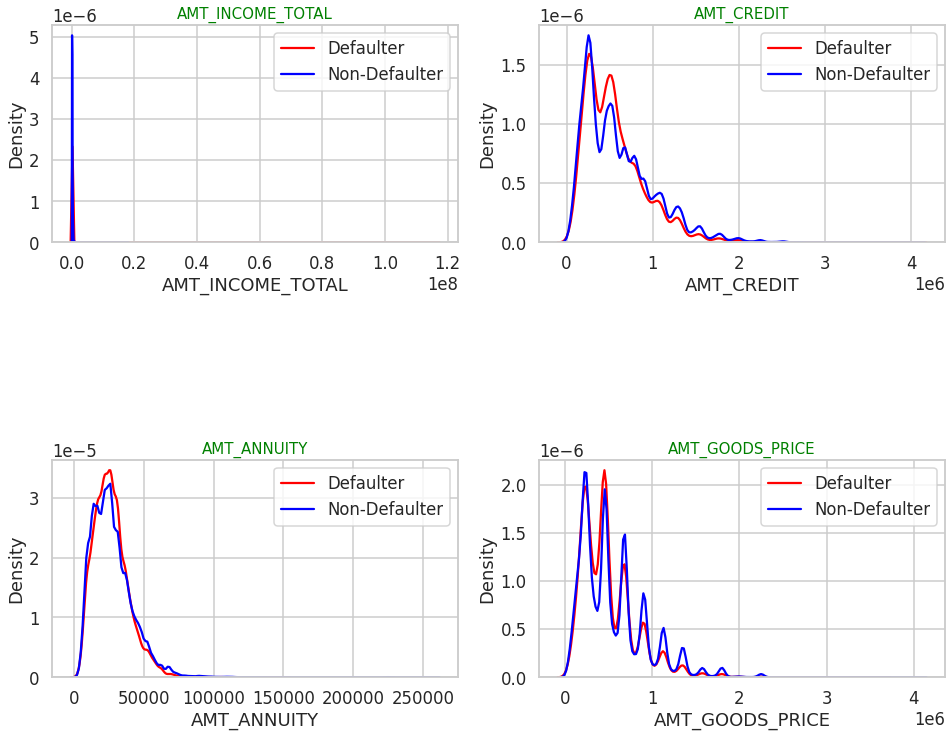

In [82]:
amt_vars = application[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amt_vars):
    plt.subplot(2,2,i[0]+1)
    plt.subplots_adjust(hspace=1)
    sns.distplot(defaulter[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(non_defaulter[i[1]], hist=False, color='b', label ="Non-Defaulter")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Green'}) 
    plt.legend()

plt.show()

# Majority of the people pay AMT_ANNUITY below 50000
# AMT_CREDIT for most of the loan is mostly less than 2
# The ratio of Defaulter vs Non-Defaulter shows similar trend.

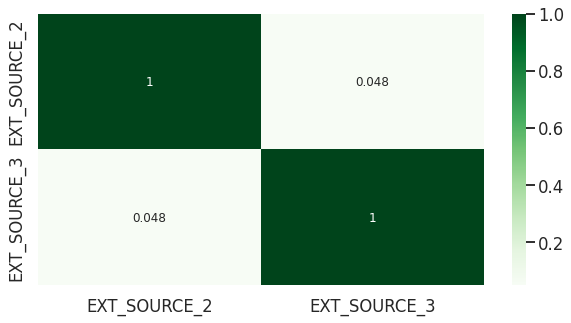

In [83]:
# Defaulter
# Check if EXT_SOURCE_2 and EXT_SOURCE_3 have any co-relation

ext_source = defaulter[["EXT_SOURCE_2","EXT_SOURCE_3"]]
ext_source_corr = ext_source.corr()
plt.figure(figsize = (10,5))
sns.heatmap(ext_source_corr,xticklabels=ext_source_corr.columns,yticklabels=ext_source_corr.columns,annot = True,cmap ="Greens", annot_kws={"fontsize":12})
plt.show()

# We see not co-relation between EXT_SOURCE_2 and EXT_SOURCE_3

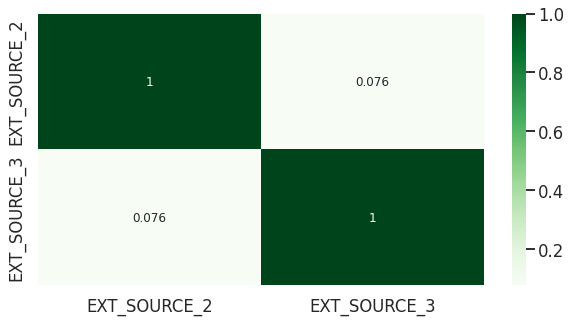

In [84]:
# Non - Defaulter
# Check if EXT_SOURCE_2 and EXT_SOURCE_3 have any co-relation

ext_source = non_defaulter[["EXT_SOURCE_2","EXT_SOURCE_3"]]
ext_source_corr = ext_source.corr()
plt.figure(figsize = (10,5))
sns.heatmap(ext_source_corr,xticklabels=ext_source_corr.columns,yticklabels=ext_source_corr.columns,annot = True,cmap ="Greens", annot_kws={"fontsize":12})
plt.show()

# We see not co-relation between EXT_SOURCE_2 and EXT_SOURCE_3

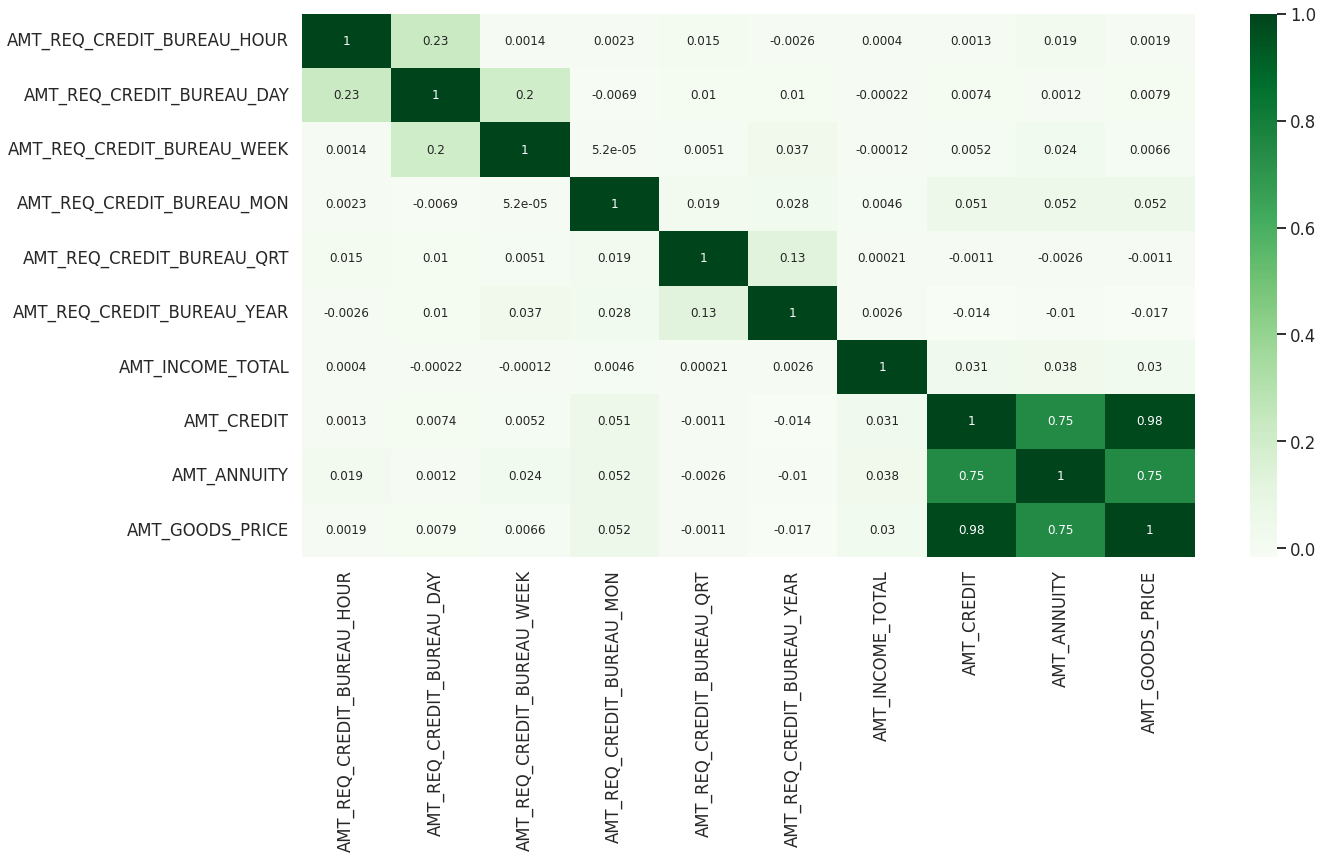

In [85]:
# Check if AMT_X have any co-relation with TARGET
amt_x = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL', 
            'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Defaulter
amt_x_corr = defaulter[amt_x].corr()
plt.figure(figsize = (20,10))
sns.heatmap(amt_x_corr,xticklabels=amt_x_corr.columns,yticklabels=amt_x_corr.columns,annot = True,cmap ="Greens", annot_kws={"fontsize":12})
plt.show()

# We see high correlation AMT_GOODS_PRICE with AMT_CREDIT for Defaulters
# We see correlation AMT_AMUTY with AMT_CREDIT

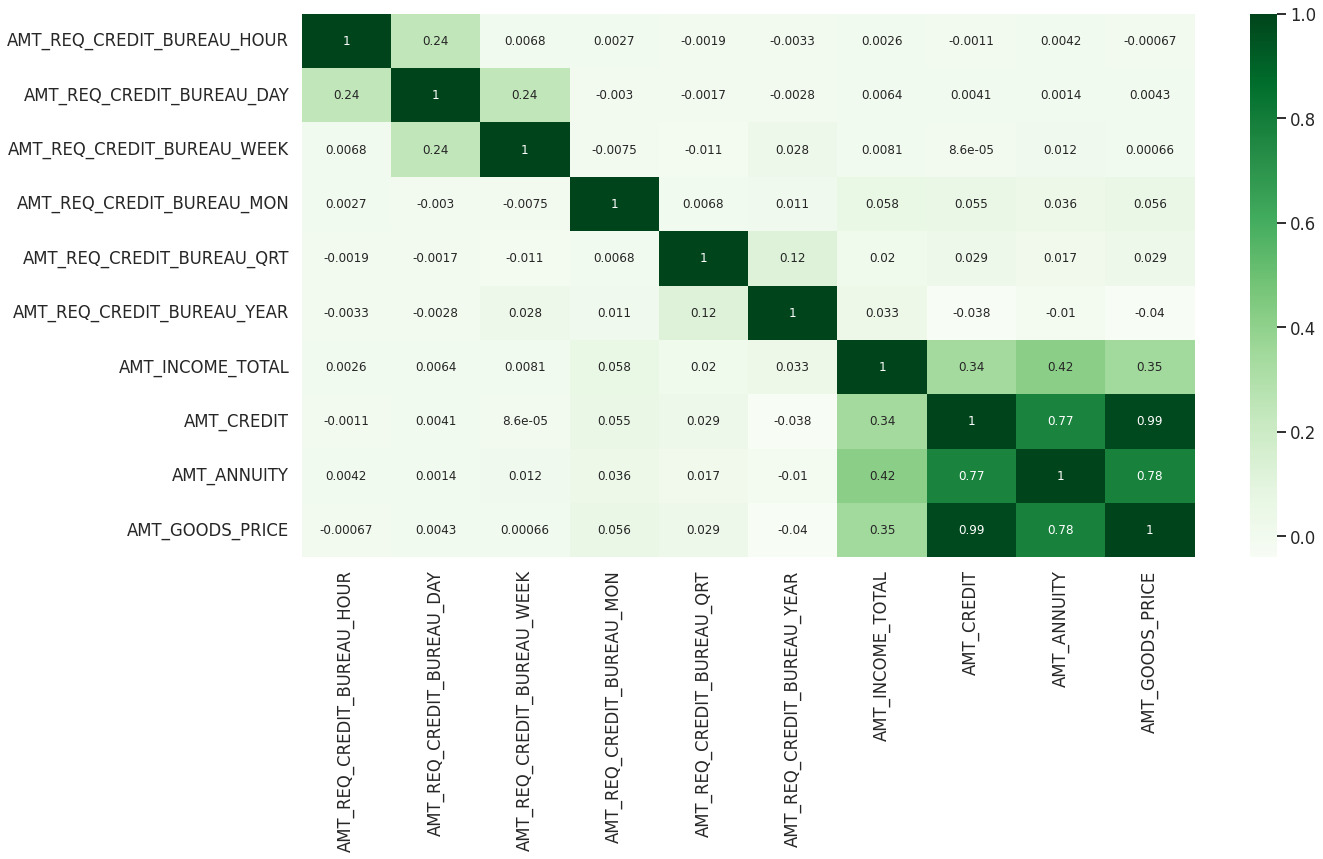

In [86]:
# Non-Defaulter
amt_x_corr = non_defaulter[amt_x].corr()
plt.figure(figsize = (20,10))
sns.heatmap(amt_x_corr,xticklabels=amt_x_corr.columns,yticklabels=amt_x_corr.columns,annot = True,cmap ="Greens", annot_kws={"fontsize":12})
plt.show()

# We don't see any strong trend here

# Multivariate analysis

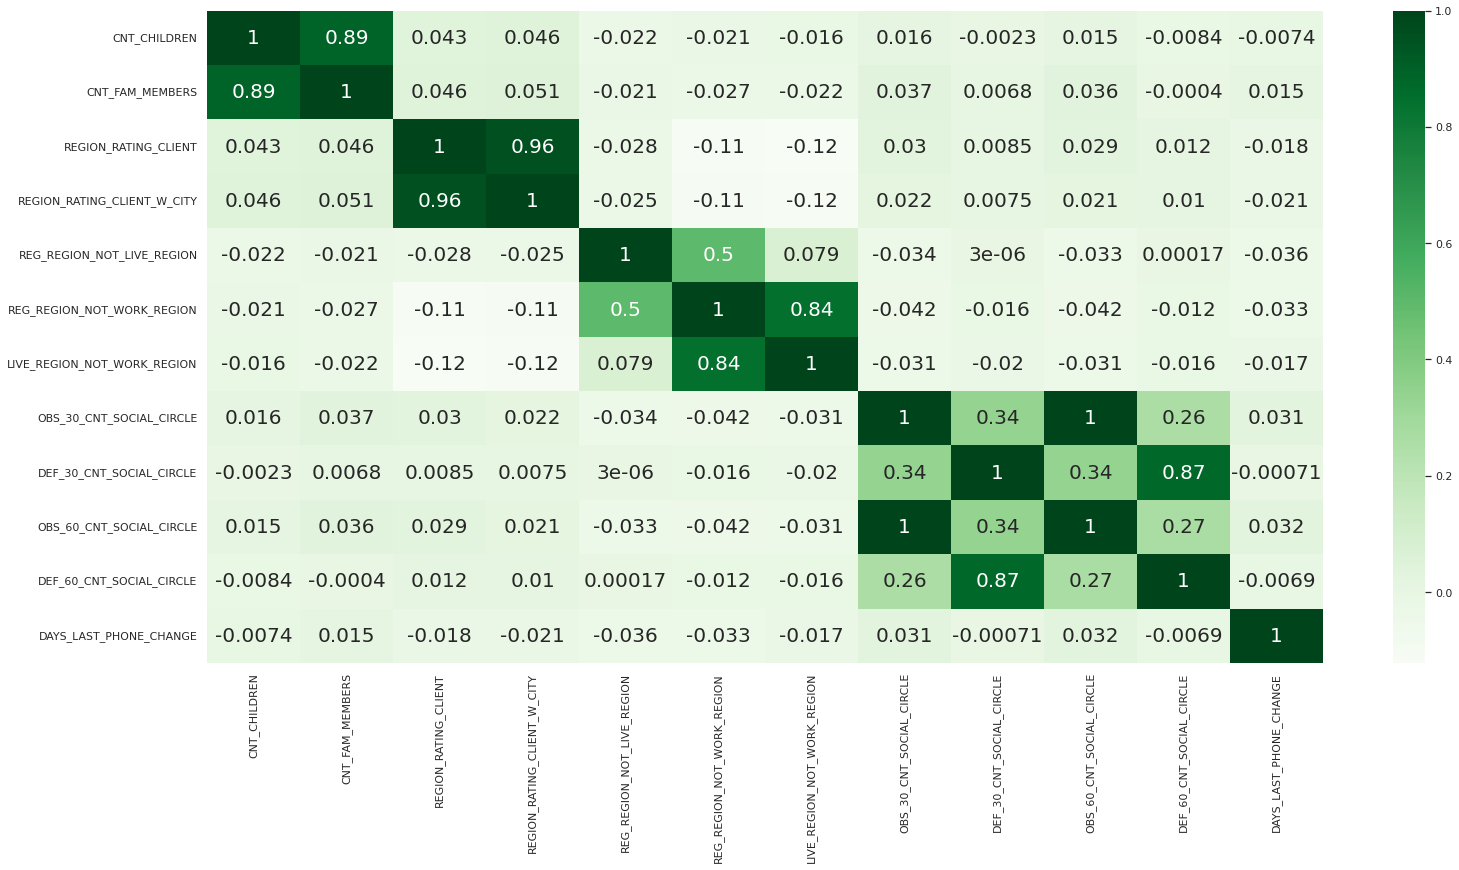

In [87]:
# defaulter
# Let create a correlation matrix for all the numerical variable and view it on a heat map

numeric_corr_vars = [
'CNT_CHILDREN',
'CNT_FAM_MEMBERS',               
'REGION_RATING_CLIENT',          
'REGION_RATING_CLIENT_W_CITY',   
'REG_REGION_NOT_LIVE_REGION',    
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'OBS_30_CNT_SOCIAL_CIRCLE',      
'DEF_30_CNT_SOCIAL_CIRCLE',      
'OBS_60_CNT_SOCIAL_CIRCLE',     
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE']      

x_corr = defaulter[numeric_corr_vars].corr()
plt.figure(figsize = (25,12))
sns.set(font_scale=1)
sns.heatmap(x_corr,xticklabels=x_corr.columns,yticklabels=x_corr.columns,annot = True,cmap ="Greens", annot_kws={"fontsize":20})
plt.show()

# We see children count and family members are highly correlated
# REGION_RATING_CLIENT AND REGION_RATING_CLIENT_W_CITY are highly correlated
# OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are highly correlated
# DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are also correlated

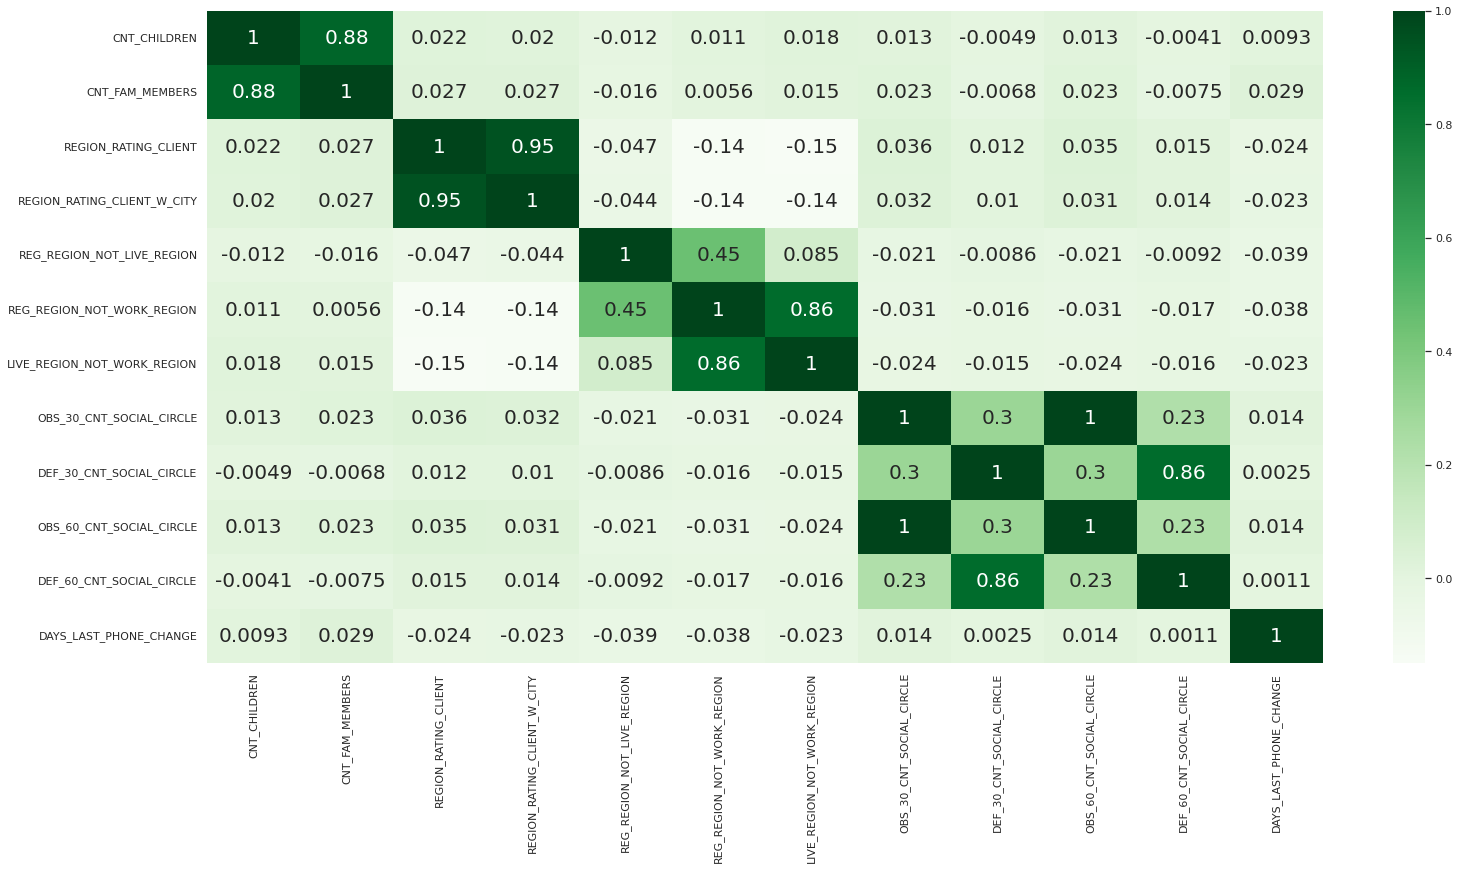

In [88]:
# non_defaulter
# Let create a correlation matrix for all the numerical variable and view it on a heat map

numeric_corr_vars = [
'CNT_CHILDREN',
'CNT_FAM_MEMBERS',               
'REGION_RATING_CLIENT',          
'REGION_RATING_CLIENT_W_CITY',   
'REG_REGION_NOT_LIVE_REGION',    
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'OBS_30_CNT_SOCIAL_CIRCLE',      
'DEF_30_CNT_SOCIAL_CIRCLE',      
'OBS_60_CNT_SOCIAL_CIRCLE',     
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE']      

x_corr = non_defaulter[numeric_corr_vars].corr()
plt.figure(figsize = (25,12))
sns.set(font_scale=1)
sns.heatmap(x_corr,xticklabels=x_corr.columns,yticklabels=x_corr.columns,annot = True,cmap ="Greens", annot_kws={"fontsize":20})
plt.show()

# We see similar trend for non-defaulters

# Merging previous application

In [89]:
# Read the previous aplication csv files
previous = pd.read_csv('previous_application.csv', on_bad_lines='skip')
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merged_application = pd.merge(application, previous, how='inner', on='SK_ID_CURR')
merged_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,DAYS_BIRTH_RANGE,DAYS_EMPLOYED_RANGE,DAYS_REGISTRATION_RANGE,DAYS_ID_PUBLISH_RANGE,DAYS_LAST_PHONE_CHANGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.650442,0.510767,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,50 - 60,5 - 10,25 - 30,5 - 10,0 - 5,2078043,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Approved,-181,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
1,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,1,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.322738,0.510767,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,50 - 60,5 - 10,10 - 15,5 - 10,0 - 5,2001242,Cash loans,16509.600,180000.0,180000.0,NaN,180000.0,SUNDAY,14,Y,1,NaN,NaN,NaN,XNA,Approved,-865,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,walk-in,Regional / Local,1200,Consumer electronics,18.0,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0
2,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,1,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.322738,0.510767,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.

In [91]:
# Identifying the shape of attribute data frame
merged_application.shape

(265848, 115)

In [92]:
# Check info of application dataset
# We will set verbose True to print the full summary
merged_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265848 entries, 0 to 265847
Data columns (total 115 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  int64   
 5    FLAG_OWN_REALTY               int64   
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE_x             object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH                 

In [93]:
# Describe numberical columns
merged_application.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,265848.000000,265848.000000,265848.000000,265848.000000,265848.000000,2.658480e+05,2.658480e+05,265828.000000,2.656470e+05,265848.000000,265848.00000,265848.000000,265848.000000,265848.000000,265848.0,265848.000000,265848.000000,265848.000000,265848.000000,265848.000000,265848.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,2.655240e+05,265848.000000,265258.000000,265258.000000,265258.000000,265258.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265847.000000,265848.000000,265848.000000,265848.000000,265848.000000,265848.000000,265848.000000,2.658480e+05,208704.000000,2.658480e+05,2.658480e+05,1.265670e+05,2.065160e+05,265848.000000,265848.000000,126567.000000,859.000000,859.000000,265848.000000,2.658480e+05,208705.000000,161421.000000,161421.000000,161421.000000,161421.000000,161421.000000,161421.000000
mean,219308.744019,0.085556,0.336685,0.722695,0.406070,1.739732e+05,5.875775e+05,27019.731302,5.278045e+05,0.020749,16318.82300,2439.935448,4999.145320,3038.128352,1.0,0.805137,0.183289,0.999255,0.282015,0.071695,2.153166,2.059854,2.038274,11.985879,0.012041,0.043841,0.035848,0.073185,0.221808,0.173784,5.112314e-01,0.493550,1.536466,0.154582,1.519053,0.108144,1083.634760,0.000053,0.739523,0.000087,0.013940,0.089096,0.000233,0.073715,0.003273,0.000090,0.001772,0.000004,0.001629,0.001471,0.000639,0.005947,0.000135,0.004070,0.000414,0.000312,0.000252,0.005292,0.005887,0.033967,0.261364,0.314635,2.675875,1.920623e+06,15699.408790,1.734723e+05,1.941577e+05,6.673123e+03,2.233474e+05,12.481437,0.996423,0.080191,0.186123,0.777601,-884.874913,3.157124e+02,15.952541,342616.975431,13151.890820,32707.717689,76508.656544,82267.075331,0.327132
std,68918.511524,0.279708,0.472577,0.447669,0.720092,3.383066e+05,3.851504e+05,13949.267594,3.532900e+05,0.013394,4360.60473,2073.737436,3547.608755,1508.215273,0.0,0.396096,0.386904,0.027281,0.449981,0.257983,0.903013,0.498018,0.490614,3.230168,0.109068,0.204742,0.185911,0.260440,0.415463,0.378924,1.914119e-01,0.178554,2.479748,0.466289,2.458278,0.379884,800.858105,0.007257,0.438896,0.009301,0.117244,0.284883,0.015270,0.261308,0.057113,0.009501,0.042054,0.001939,0.040325

# Handle missing value and outlier of merged application

In [94]:
# Cleanup NAME_CONTRACT_TYPE_y
merged_application.NAME_CONTRACT_TYPE_y = merged_application.NAME_CONTRACT_TYPE_y.replace("XNA", np.nan)

In [95]:
# NAME_CONTRACT_STATUS invalid values cleanup
# Here we will replace all values which are repeated less than 8 time NaN
most_occuring_values = merged_application.NAME_CONTRACT_STATUS.value_counts().loc[lambda x: x > 1].index
print(most_occuring_values)
merged_application.NAME_CONTRACT_STATUS = merged_application.NAME_CONTRACT_STATUS.apply(lambda x: x if x in most_occuring_values else np.NaN)

Index(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype='object')


In [96]:
# NAME_CASH_LOAN_PURPOSE invalid values cleanup
# Here we will replace all values which are repeated less than 8 time NaN
most_occuring_values = merged_application.NAME_CASH_LOAN_PURPOSE.value_counts().loc[lambda x: x > 1].index
print(most_occuring_values)
merged_application.NAME_CASH_LOAN_PURPOSE = merged_application.NAME_CASH_LOAN_PURPOSE.apply(lambda x: x if x in most_occuring_values else np.NaN)

Index(['XAP', 'XNA', 'Repairs', 'Other', 'Urgent needs', 'Buying a used car',
       'Building a house or an annex', 'Everyday expenses', 'Medicine',
       'Payments on other loans', 'Education', 'Journey',
       'Wedding / gift / holiday', 'Purchase of electronic equipment',
       'Buying a new car', 'Buying a home', 'Furniture', 'Car repairs',
       'Buying a holiday home / land', 'Business development',
       'Gasification / water supply', 'Buying a garage', 'Hobby',
       'Money for a third person', 'Refusal to name the goal'],
      dtype='object')


# Merged analysis

In [97]:
merged_application_deaulter = merged_application[merged_application.TARGET == 1]
merged_application_non_deaulter = merged_application[merged_application.TARGET == 0]

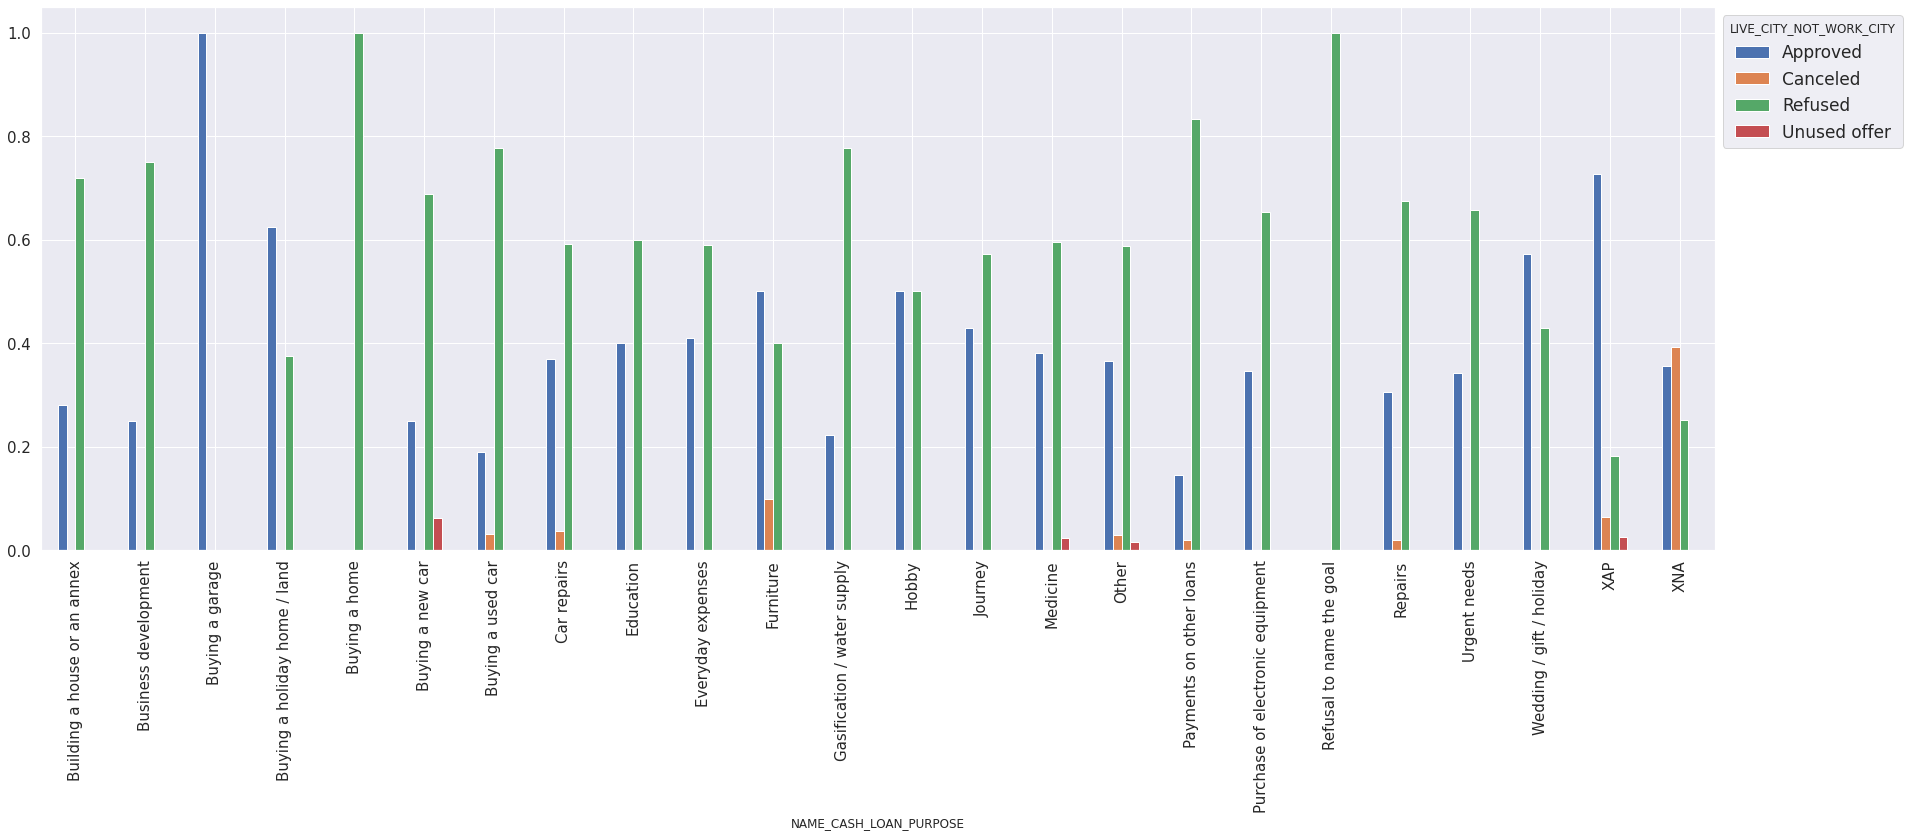

In [98]:
# Using a bar chart we will see the distribution of NAME_CONTRACT_STATUS with NAME_CASH_LOAN_PURPOSE

category_wise = merged_application_deaulter.groupby("NAME_CASH_LOAN_PURPOSE")["NAME_CONTRACT_STATUS"].value_counts(normalize=True)
category_wise.unstack(level='NAME_CONTRACT_STATUS').plot(kind='bar', figsize=(30,10), fontsize=15)
plt.legend(title=item, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17)
plt.show()
# We see that defaulter has mostly refused the contract where purpose was Money for third person and Refusal to name the goal

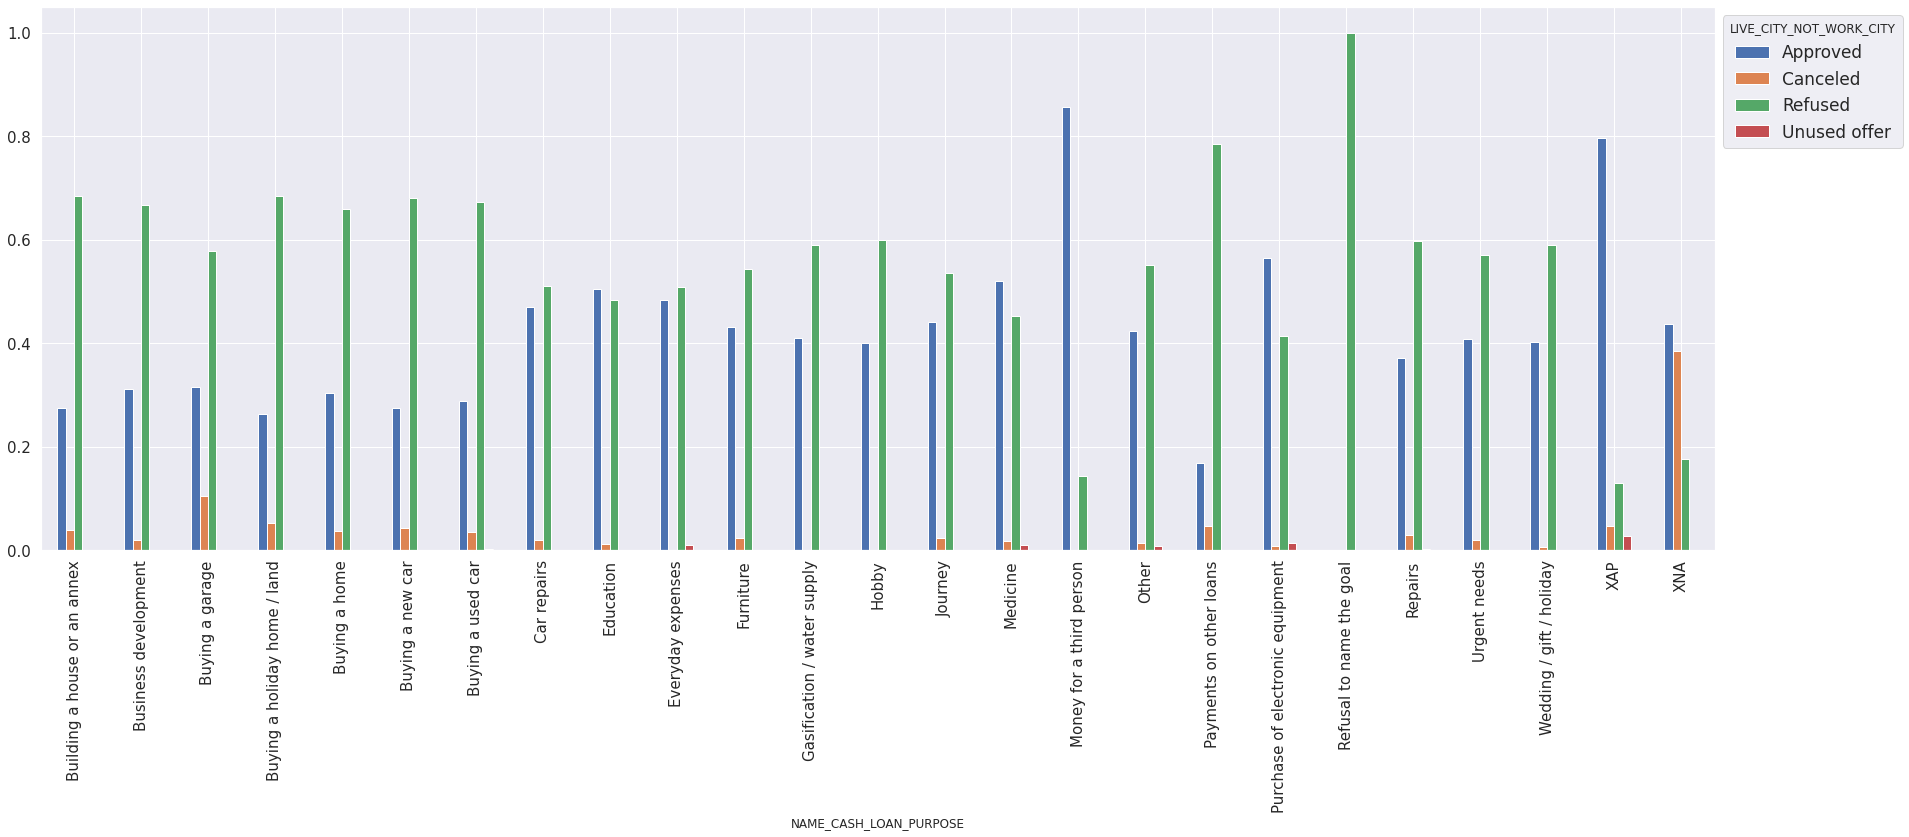

In [99]:
# Using a bar chart we will see the distribution of NAME_CONTRACT_STATUS with NAME_CASH_LOAN_PURPOSE

category_wise = merged_application_non_deaulter.groupby("NAME_CASH_LOAN_PURPOSE")["NAME_CONTRACT_STATUS"].value_counts(normalize=True)
category_wise.unstack(level='NAME_CONTRACT_STATUS').plot(kind='bar', figsize=(30,10), fontsize=15)
plt.legend(title=item, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17)

# We see for non defaulter majority of the contract was approved for Money for third person and refused for payment on other goals and also where customer refused to name the goal

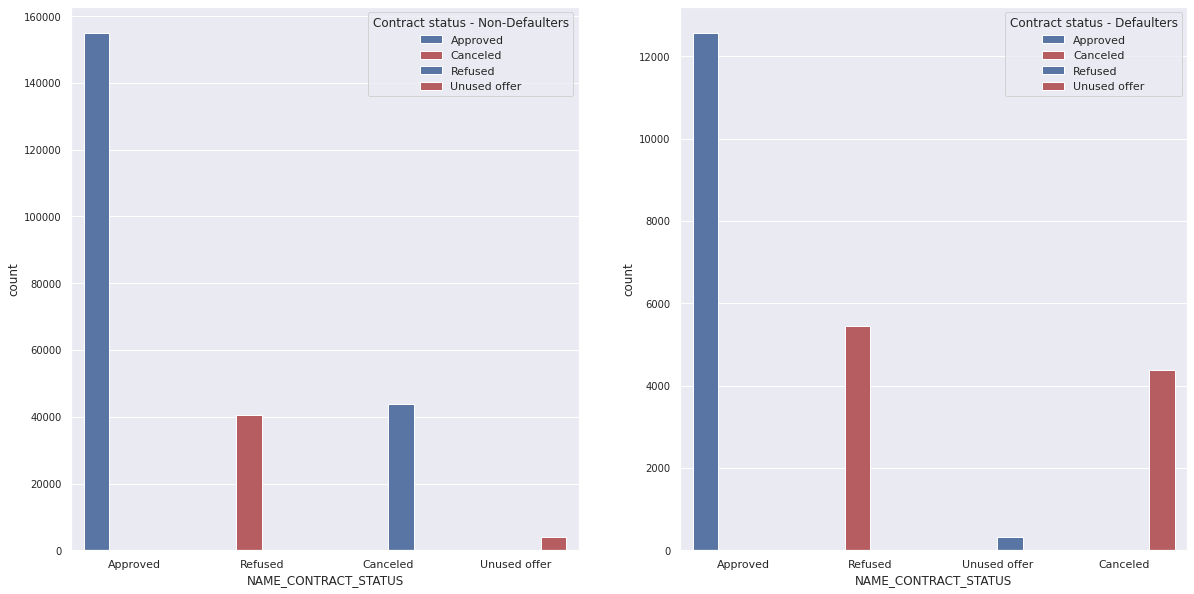

In [100]:
# Imbalance of NAME_CONTRACT_STATUS with respect to Defaulters and Non-Defaulters

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.yticks(fontsize=10)
sns.countplot(data=merged_application_non_deaulter, x="NAME_CONTRACT_STATUS", hue="NAME_CONTRACT_STATUS", palette=["b","r"])
plt.legend(title='Contract status - Non-Defaulters', labels=merged_application_non_deaulter["NAME_CONTRACT_STATUS"].value_counts().index)
plt.subplot(1,2,2)
plt.yticks(fontsize=10)
sns.countplot(data=merged_application_deaulter, x="NAME_CONTRACT_STATUS", hue="NAME_CONTRACT_STATUS", palette=["b","r"])
plt.legend(title='Contract status - Defaulters', labels=merged_application_non_deaulter["NAME_CONTRACT_STATUS"].value_counts().index)
plt.show()

# We see see Non-Defaulters have the highest approval count, where as Defaulters have the highest Refusal count

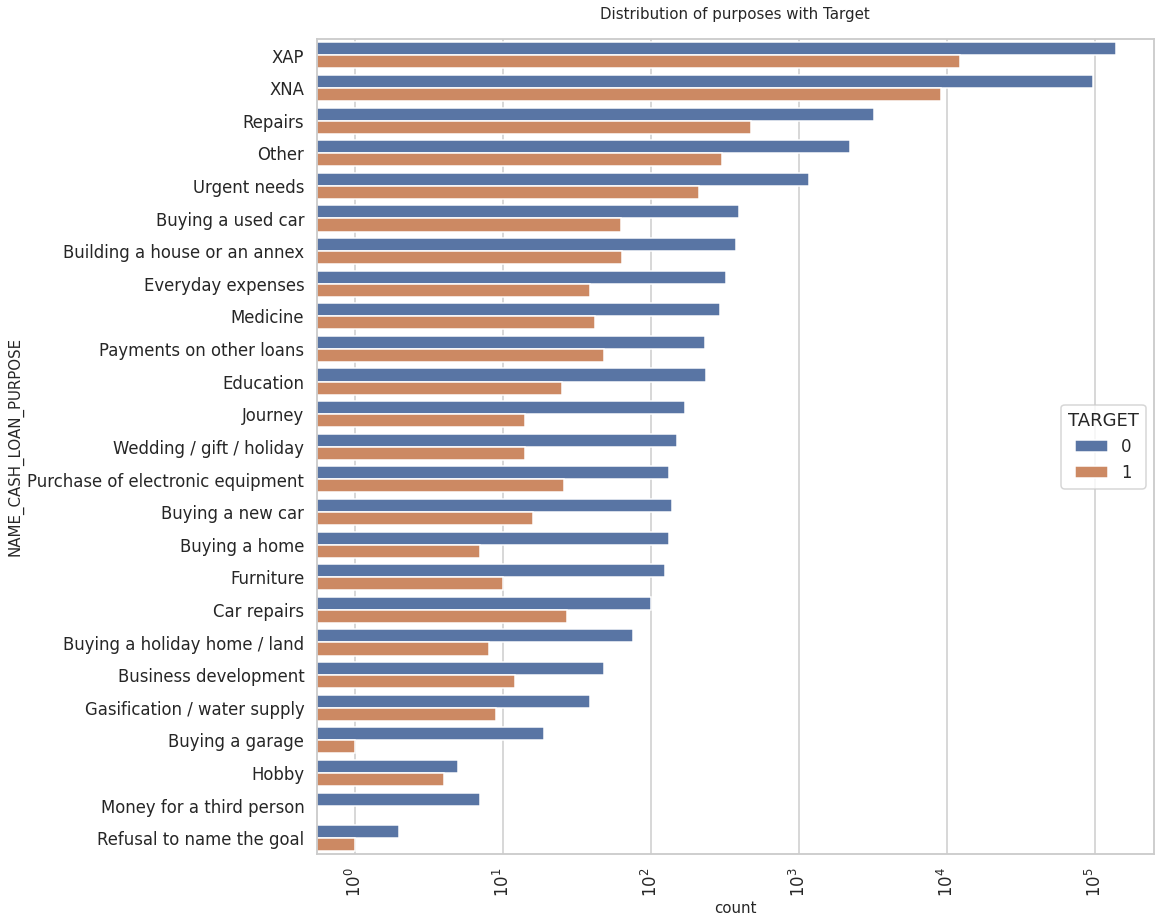

In [101]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 20
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with Target')
ax = sns.countplot(data = merged_application, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'TARGET')

# We see that most of the Defaulter are those who takes loan for repairs.
# Other categories with payment difficulties are Other, Urgent needs, buying a used car

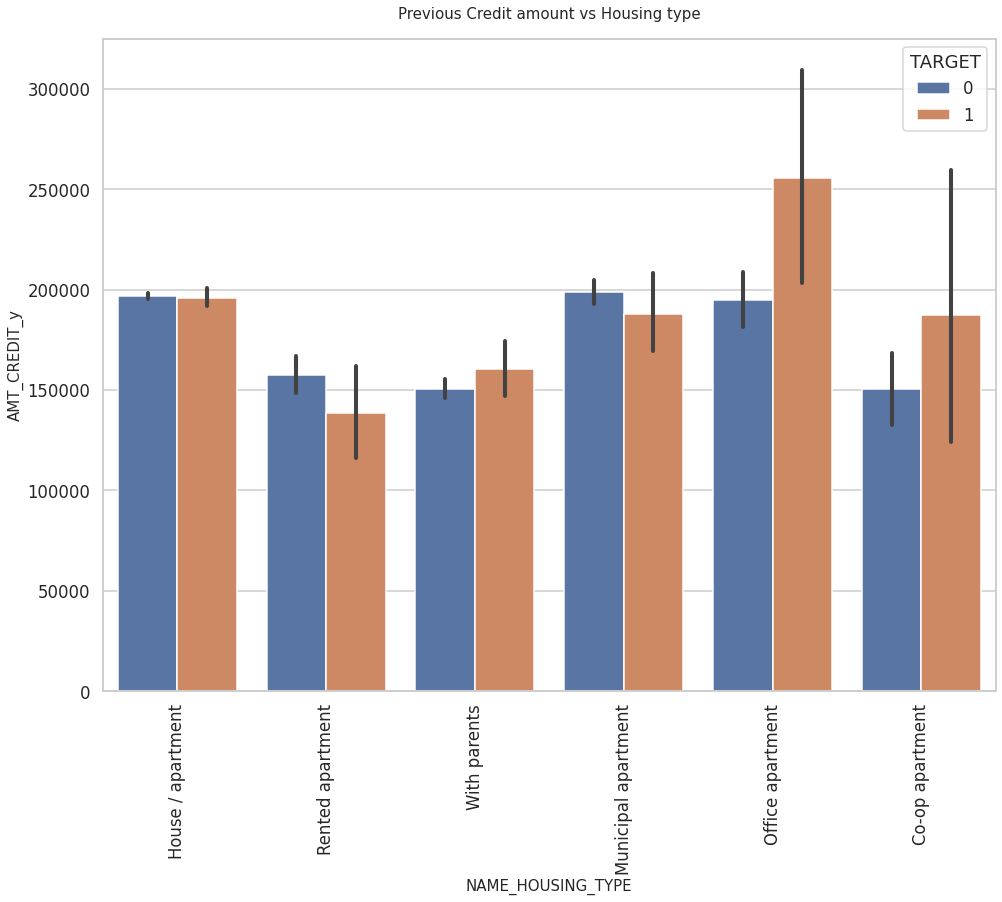

In [102]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = merged_application, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Previous Credit amount vs Housing type')
plt.show()

# We see that customers with previous loan and Housing type Office apartment / Co-operative apartment have difficulties with payment